# Medical Health Insurance Cost Analysis and Prediction _ Global AI Hub Machine Learning Bootcamp

Dataset - https://www.kaggle.com/mirichoi0218/insurance

In [367]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scp
from scipy import stats
from pylab import *
import warnings
warnings.filterwarnings('ignore')

In [368]:
# Visualization Plot Settings
sns.set(rc={'figure.figsize':(15,5)})

In [516]:
# Load the dataset
df = pd.read_csv("insurance.csv")

In [370]:
# Display the first 5 rows
df.head()

age   sex      bmi   children smoker   region      charges  
0  19   female  27.900      0      yes   southwest  16884.92400
1  18     male  33.770      1       no   southeast   1725.55230
2  28     male  33.000      3       no   southeast   4449.46200
3  33     male  22.705      0       no   northwest  21984.47061
4  32     male  28.880      0       no   northwest   3866.85520

In [371]:
#Display the last 5 rows
df.tail()

age   sex     bmi   children smoker   region      charges 
1333  50     male  30.97      3       no   northwest  10600.5483
1334  18   female  31.92      0       no   northeast   2205.9808
1335  18   female  36.85      0       no   southeast   1629.8335
1336  21   female  25.80      0       no   southwest   2007.9450
1337  61   female  29.07      0      yes   northwest  29141.3603

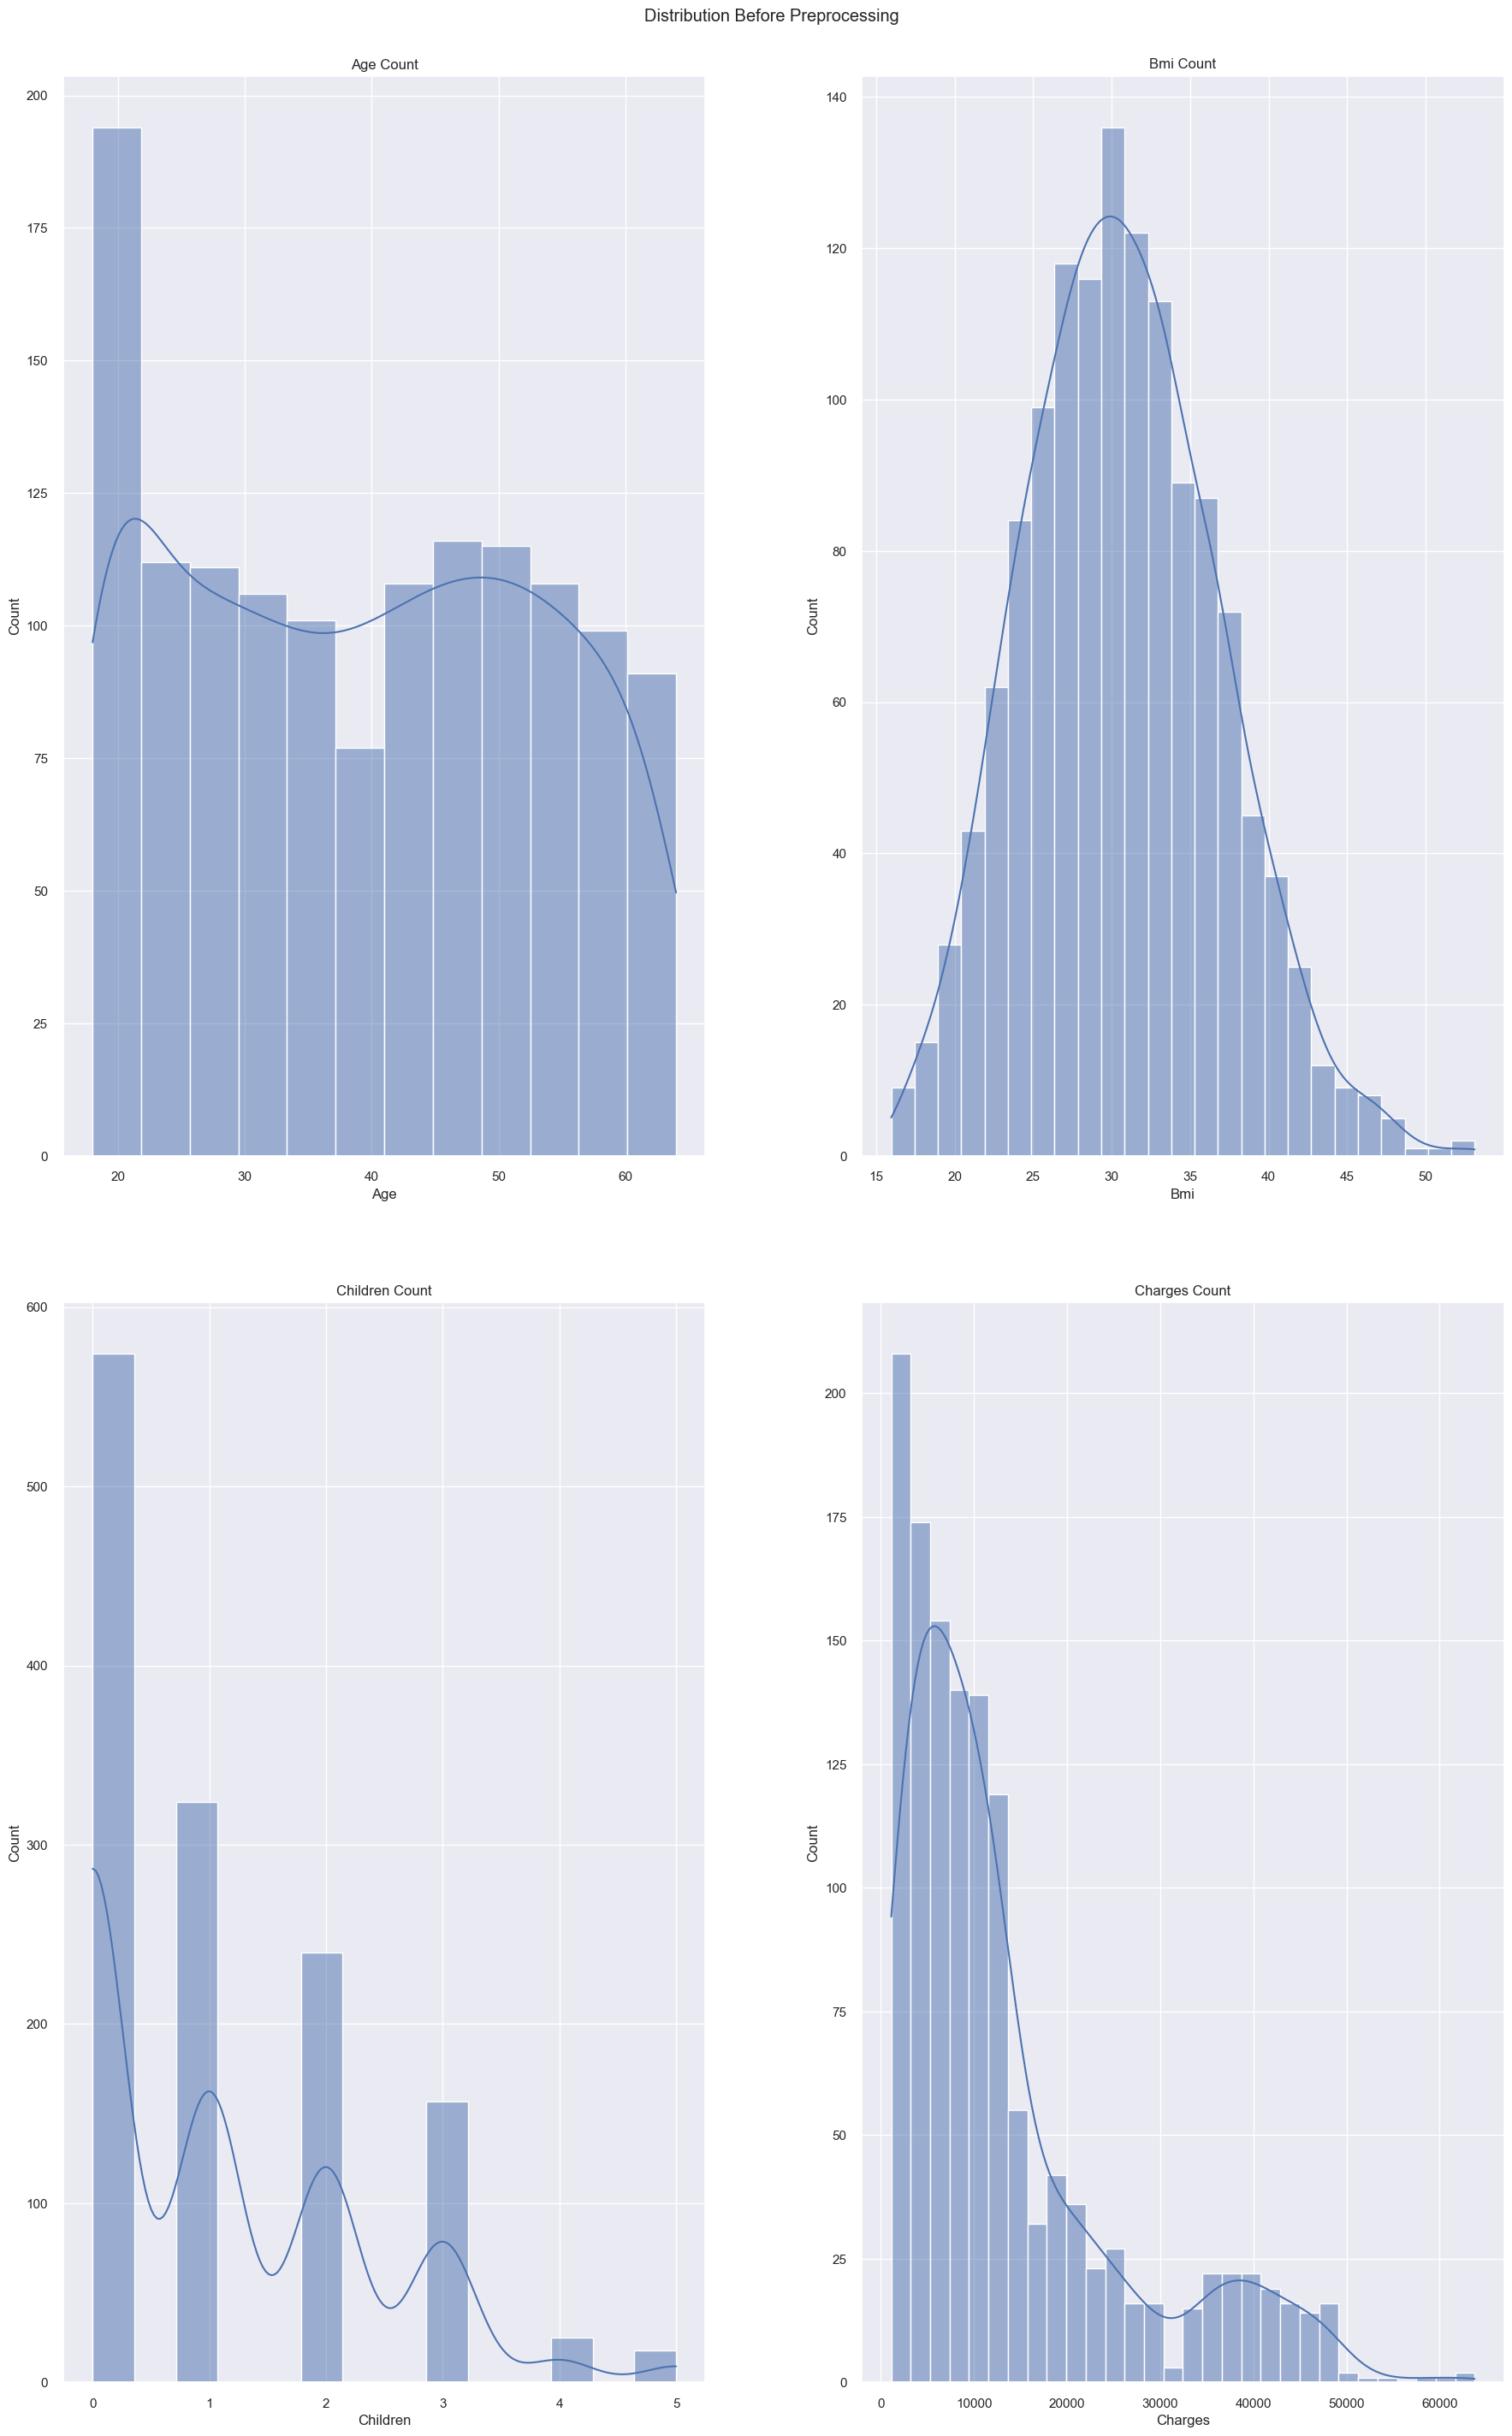

In [372]:
#  Plot histograms to visualize the distribution of the numerical variables

f, axes = plt.subplots(2, 2, figsize = (20, 30))
f.tight_layout(pad=8)
f.suptitle("Distribution Before Preprocessing")
cols = df.select_dtypes(exclude="object").columns

x_axis = 0
y_axis = 0

for col in cols:
  sns.histplot(data=df, x=col, kde=True, ax=axes[x_axis, y_axis])
  axes[x_axis,y_axis].set_xlabel(col.title())
  axes[x_axis,y_axis].set_ylabel("Count")
  axes[x_axis,y_axis].set_title(f"{col.title()} Count")

  if y_axis == 1:
    y_axis = 0
    x_axis += 1
    # continue
  else:
    y_axis += 1

plt.show()

Ages are more or less evenly distributed, except for a peak in the 20 years old bucket and a minimum in the 40 years old bucket.
BMI has a normal distribution, centered around 30. It presents a slight right tail, although it is quite small.
The children distribution steadily decreases from its maximum at 0 to its minimum at 5 children.
The distribution of charges is stronkly skewed to the right, achieving its highest peak at values close to 0. It then decreases steadily until about 30000 dollars, where it starts to increase slightly again. There is a small second peak at around 40000 dollars, and then it steadlily decreases again.

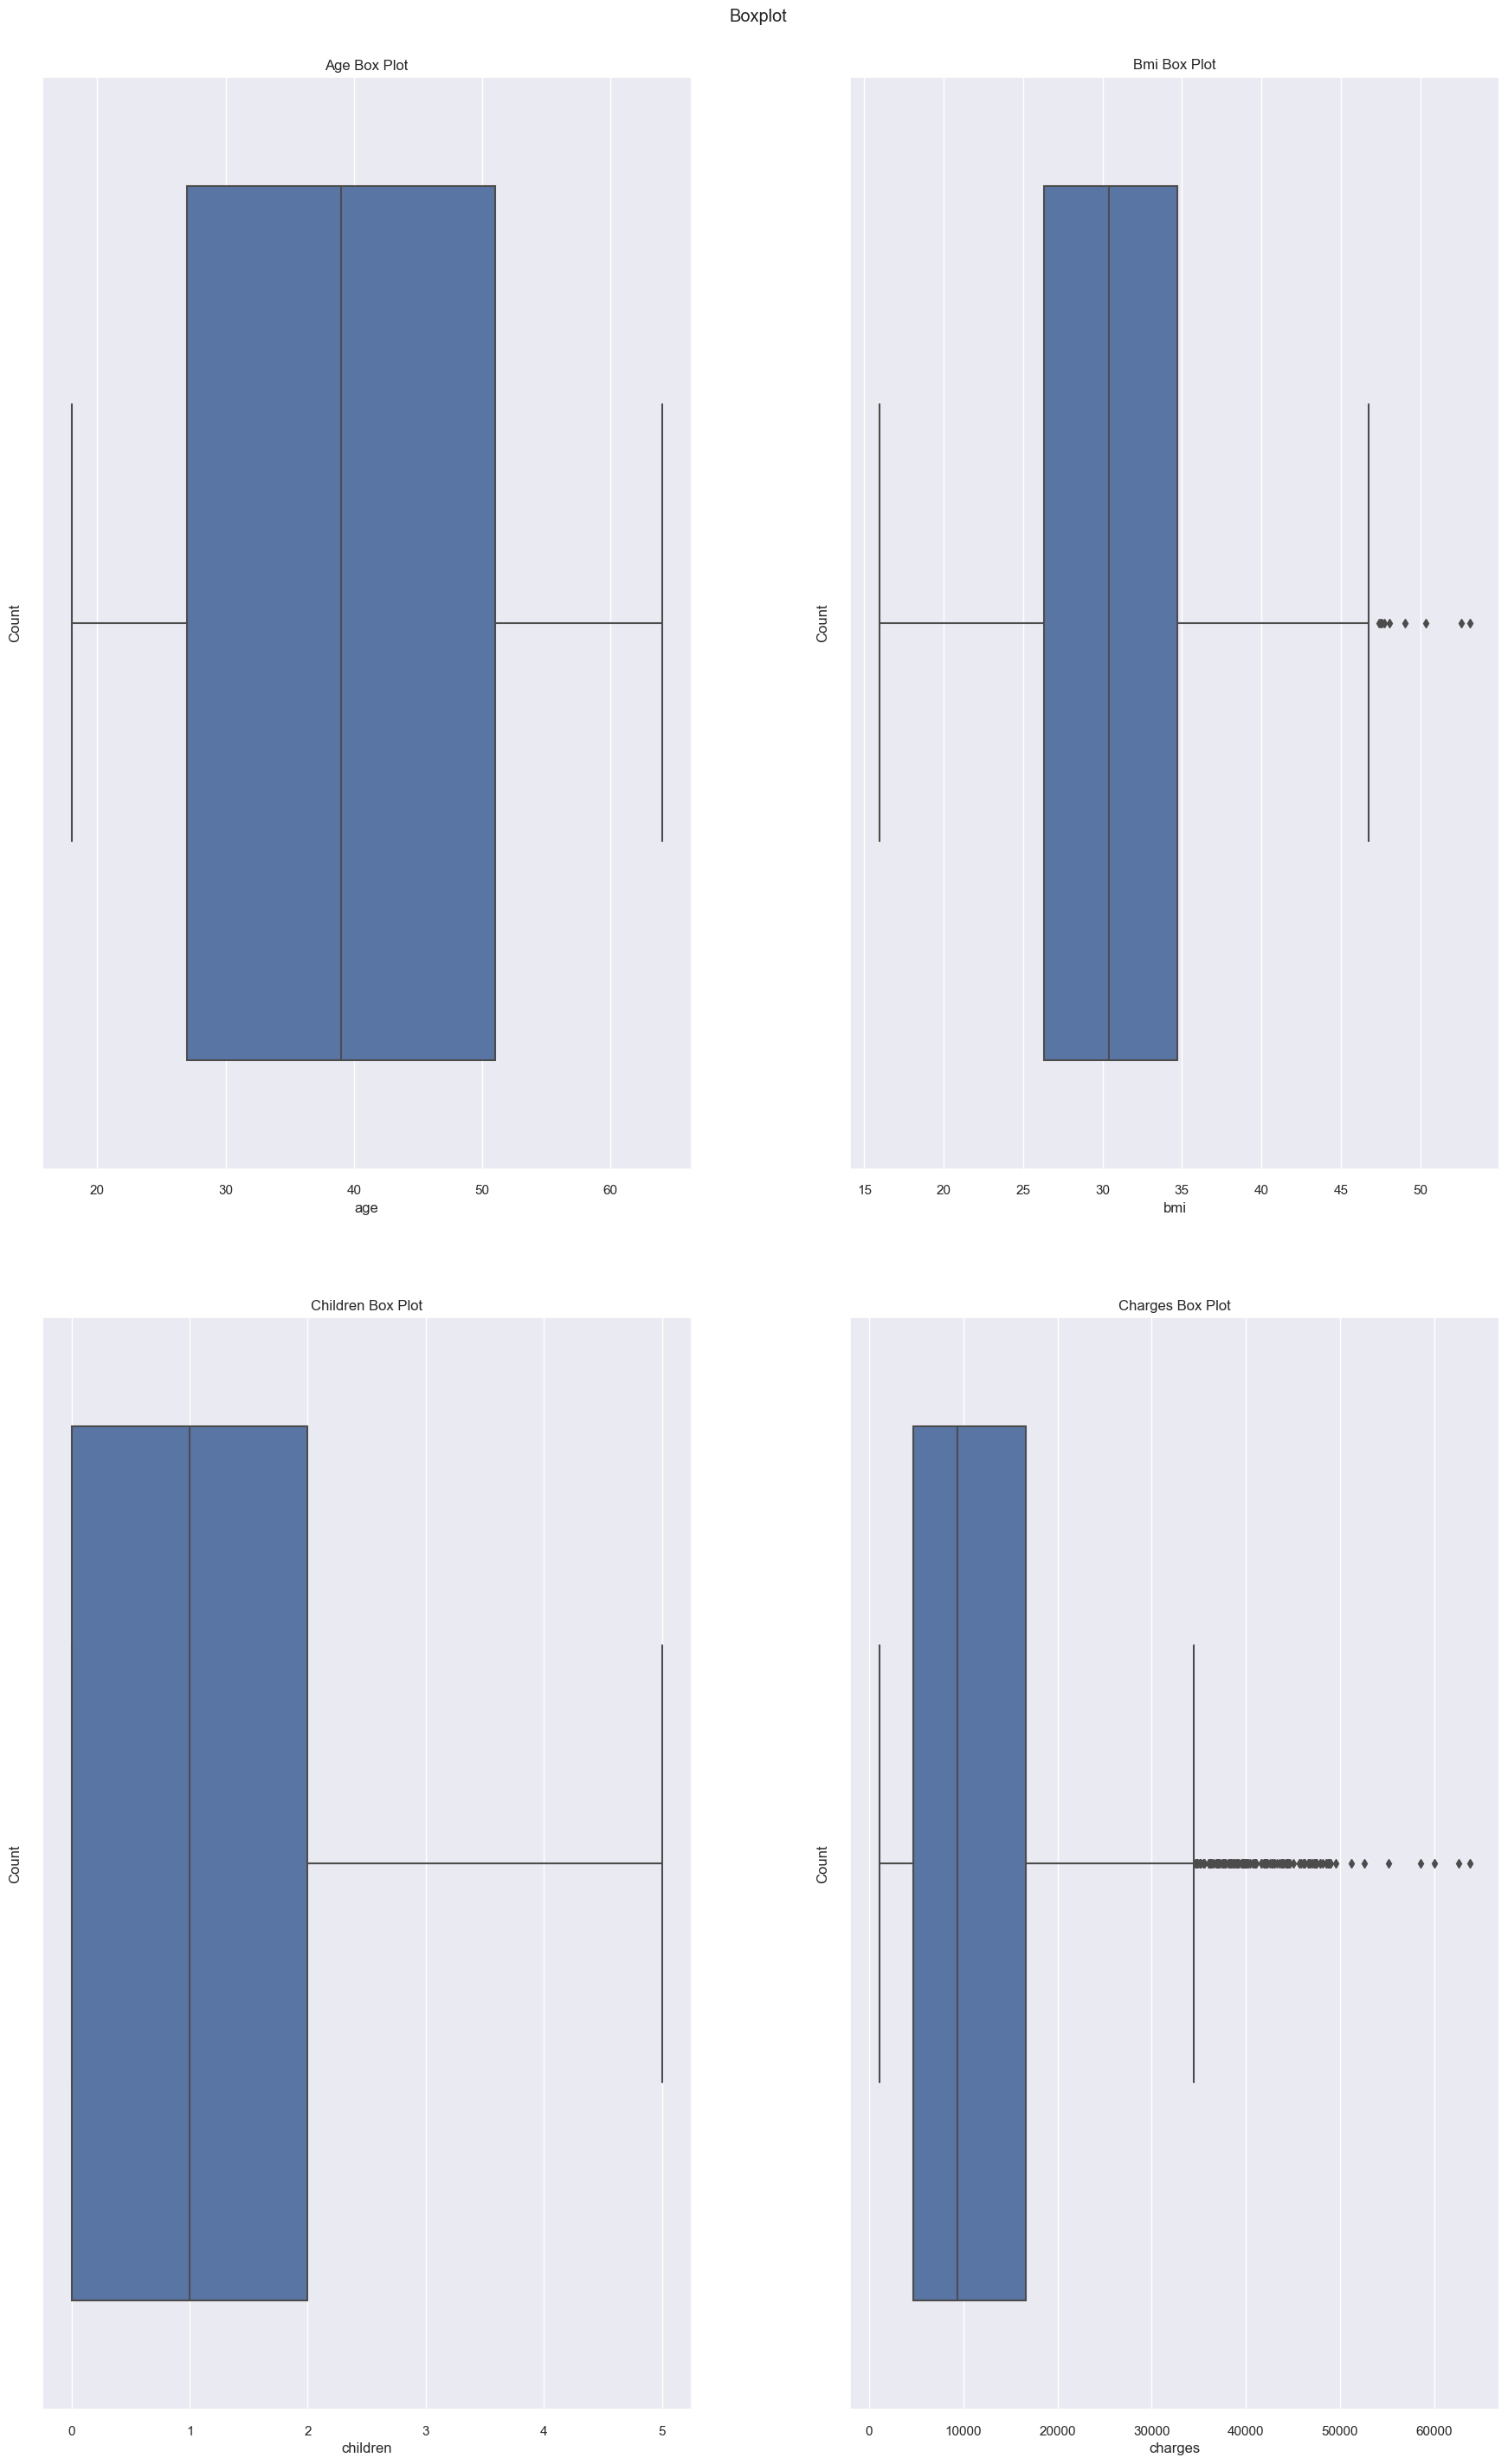

In [373]:
# Plot the boxplots of the numerical variables
f, axes = plt.subplots(2, 2, figsize = (20, 30))
f.tight_layout(pad=8)
f.suptitle("Boxplot")
cols = df.select_dtypes(exclude=["object","category"]).columns

x_axis = 0
y_axis = 0

for col in cols:
  sns.boxplot(data=df, x=col, ax=axes[x_axis, y_axis])
  axes[x_axis,y_axis].set_xlabel(col)
  axes[x_axis,y_axis].set_ylabel("Count")
  axes[x_axis,y_axis].set_title(f"{col.title()} Box Plot")

  if y_axis == 1:
    y_axis = 0
    x_axis += 1
    # continue
  else:
    y_axis += 1

plt.show()

The boxplot shows the median, the first quartile, the third quartile and the outliers. 

The age median is 39.00, the first quartile is 27 and the third quartile is 51. The distribution looks quite even. There is no outliers.

The BMI median is almost 30, the first quartile is 26, the third quartile isalmost  31 and the third quartile is almost 34. BMI follows a normal distribution, there are some outliers to the right.

The children median is 1, the first quartile is 0 and the third quartile is 2. The distribution is strongly skewed to the right. There is no outliers.

The charges median is almost 10000, the first quartile is 5000, the third quartile is almost 18000. BMI follows a normal distribution, there are some outliers to the right.

## Identification of outliers

Identify the outliers for the variables that are found in the box-plot section. These are bmi and charges.

In [374]:
# Get outliers 
def outliers (data):
    df_iqr = stats.iqr(data)
    print(f"Interquartile range: {df_iqr}")
    
   # To locate the first and third quartiles
    df_q1, df_q3 = np.quantile(data, [0.25, 0.75])
 
    # Set the limits of outliers
    cut_low = df_q1 - 1.5 * df_iqr
    cut_high = df_q3 + 1.5 * df_iqr
 
    print("Lower and upper outlier limits:", cut_low, ", ", cut_high)
 
    # Obtain all the outliers from the dataset based on the calculated limits
    df_outliers = df.loc[(data < cut_low) | (data > cut_high)]


    print('We have a total of', len(df_outliers), 'outliers')

    return df_outliers

In [375]:
# Outliers for age
age_outl = outliers(df.age)
age_outl

Interquartile range: 24.0
Lower and upper outlier limits: -9.0 ,  87.0
We have a total of 0 outliers


Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []

There is no outliers in this age

In [376]:
# Outliers for bmi
bmi_outl = outliers(df.bmi)
bmi_outl

Interquartile range: 8.3975
Lower and upper outlier limits: 13.7 ,  47.290000000000006
We have a total of 9 outliers


age   sex     bmi   children smoker   region      charges  
116   58     male  49.06      0       no   southeast  11381.32540
286   46   female  48.07      2       no   northeast   9432.92530
401   47     male  47.52      1       no   southeast   8083.91980
543   54   female  47.41      0      yes   southeast  63770.42801
847   23     male  50.38      1       no   southeast   2438.05520
860   37   female  47.60      2      yes   southwest  46113.51100
1047  22     male  52.58      1      yes   southeast  44501.39820
1088  52     male  47.74      1       no   southeast   9748.91060
1317  18     male  53.13      0       no   southeast   1163.46270

There are 9 outliers in this bmi

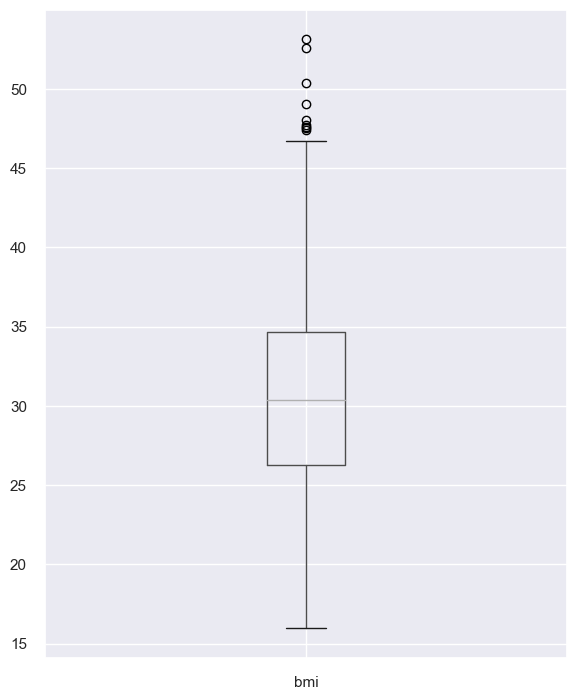

In [377]:
# Representation bmi outliers using boxplot 
getPlot = df.boxplot(column='bmi', figsize=(6, 8))

In [378]:
# Outliers for children
children_outl = outliers(df.children)
children_outl

Interquartile range: 2.0
Lower and upper outlier limits: -3.0 ,  5.0
We have a total of 0 outliers


Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []

There is no outliers in this children

In [379]:
# Outliers for charges
charges_outl = outliers(df.charges)
charges_outl

Interquartile range: 11899.625365
Lower and upper outlier limits: -13109.1508975 ,  34489.350562499996
We have a total of 139 outliers


age   sex      bmi   children smoker   region      charges  
14    27     male  42.130      0      yes   southeast  39611.75770
19    30     male  35.300      0      yes   southwest  36837.46700
23    34   female  31.920      1      yes   northeast  37701.87680
29    31     male  36.300      2      yes   southwest  38711.00000
30    22     male  35.600      0      yes   southwest  35585.57600
34    28     male  36.400      1      yes   southwest  51194.55914
38    35     male  36.670      1      yes   northeast  39774.27630
39    60     male  39.900      0      yes   southwest  48173.36100
49    36     male  35.200      1      yes   southeast  38709.17600
53    36     male  34.430      0      yes   southeast  37742.57570
55    58     male  36.955      2      yes   northwest  47496.49445
82    22     male  37.620      1      yes   southeast  37165.16380
84    37   female  34.800      2      yes   southwest  39836.51900
86    57   female  31.160      0      yes   northwest  43578.93940
94    64   female  31.300      2      yes   southwest  47291.05500
109   63     male  35.090      0      yes   southeast  47055.53210
123   44     male  31.350      1      yes   northeast  39556.49450
146   46     male  30.495      3      yes   northwest  40720.55105
158   30     male  35.530      0      yes   southeast  36950.25670
161   18   female  36.850      0      yes   southeast  36149.48350
175   63   female  37.700      0      yes   southwest  48824.45000
185   36     male  41.895      3      yes   northeast  43753.33705
203   27   female  36.080      0      yes   southeast  37133.89820
223   19     male  34.800      0      yes   southwest  34779.61500
240   23   female  36.670      2      yes   northeast  38511.62830
242   55   female  26.800      1       no   southwest  35160.13457
251   63   female  32.200      2      yes   southwest  47305.30500
252   54     male  34.210      2      yes   southeast  44260.74990
254   50     male  31.825      0      yes   northeast  41097.16175
256   56     male  33.630      0      yes   northwest  43921.18370
263   19     male  36.955      0      yes   northwest  36219.40545
265   46     male  42.350      3      yes   southeast  46151.12450
271   50     male  34.200      2      yes   southwest  42856.83800
281   54     male  40.565      3      yes   northeast  48549.17835
288   59   female  36.765      1      yes   northeast  47896.79135
292   25     male  45.540      2      yes   southeast  42112.23560
298   31     male  34.390      3      yes   northwest  38746.35510
312   43     male  35.970      3      yes   southeast  42124.51530
314   27   female  31.400      0      yes   southwest  34838.87300
322   34     male  30.800      0      yes   southwest  35491.64000
327   45     male  36.480      2      yes   northwest  42760.50220
328   64   female  33.800      1      yes   southwest  47928.03000
330   61   female  36.385      1      yes   northeast  48517.56315
338   50     male  32.300      1      yes   northeast  41919.09700
373   26     male  32.900      2      yes   southwest  36085.21900
377   24     male  40.150      0      yes   southeast  38126.24650
381   55     male  30.685      0      yes   northeast  42303.69215
420   64     male  33.880      0      yes   southeast  46889.26120
421   61     male  35.860      0      yes   southeast  46599.10840
422   40     male  32.775      1      yes   northeast  39125.33225
441   33   female  33.500      0      yes   southwest  37079.37200
476   24     male  28.500      0      yes   northeast  35147.52848
488   44   female  38.060      0      yes   southeast  48885.13561
500   29     male  34.400      0      yes   southwest  36197.69900
524   42     male  26.070      1      yes   southeast  38245.59327
530   57     male  42.130      1      yes   southeast  48675.51770
543   54   female  47.410      0      yes   southeast  63770.42801
549   43   female  46.200      0      yes   southeast  45863.20500
558   35   female  34.105      3      yes   northwest

There are 139 outliers in this charges

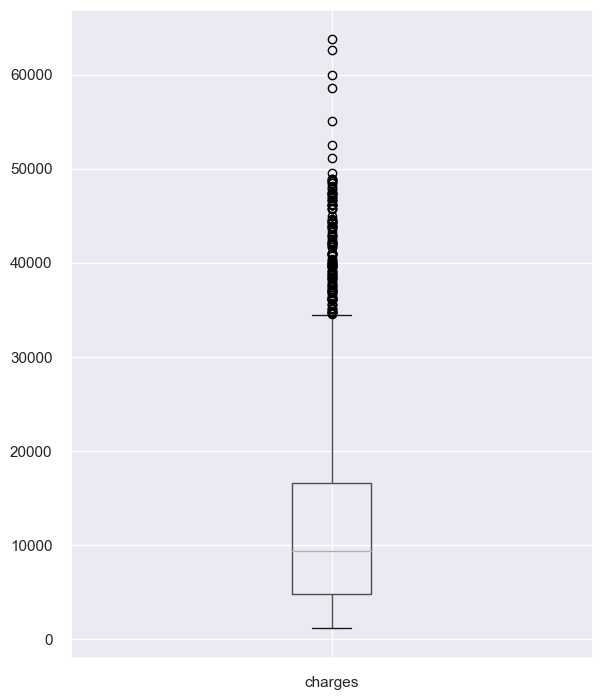

In [380]:
# Representation charges outliers using boxplot 
getPlot = df.boxplot(column='charges', figsize=(6, 8))

In [381]:
#Display the number of variables and observations
df.shape

(1338, 7)

Dataset consists of 1338 records. There are 7 columns(features) and 1338 rows

In [382]:
df.size

9366

In [383]:
# Get the detailed information of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


According to info, there are 7 columns, 1338 rows and no null values in the dataset. In addition, two of the columns are in float64 type, two of them are in int64 type and three of them are in object type.
Categorical columns: sex, smoker, region
Continuous columns: age, bmi, children, charges

In [517]:
df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['region'] = df['region'].astype('category')

In [499]:
# Display the columns
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Columns and Their Descriptions
age – Age of the person
sex – Gender of the person (Male-Female)
bmi – Body Mass Index(BMI) of the person
children – Number of children for the person
smoker – Smoking status of the person
region – Region of the person in US (northeast, southeast, southwest, northwest)
charges – Medical Insurance costs per year for the person

## Preprocessing the data (Data cleaning)

In [500]:
#Missing Value Control
df.isnull().sum()  # Their is no missing value

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [501]:
#Duplicate Value Control
df.duplicated().sum() # Check the duplicate value.  # And their is only one duplicate value

1

In [502]:
# Get duplicate (first and last) rows based on all the columns
df2 = df[df.duplicated(keep = 'first')]
df3 = df[df.duplicated(keep = 'last')]

In [503]:
df2

age  sex    bmi   children smoker   region     charges 
581  19   male  30.59      0      no    northwest  1639.5631

In [504]:
df3

age  sex    bmi   children smoker   region     charges 
195  19   male  30.59      0      no    northwest  1639.5631

In [518]:
# Remove the duplicate row
df.drop_duplicates(inplace=True)

In [519]:
df.duplicated().sum() # Their is no duplicate value now

0

In [520]:
df.shape 

(1337, 7)

In [521]:
df # Control the index

age   sex      bmi   children smoker   region      charges  
0     19   female  27.900      0      yes   southwest  16884.92400
1     18     male  33.770      1       no   southeast   1725.55230
2     28     male  33.000      3       no   southeast   4449.46200
3     33     male  22.705      0       no   northwest  21984.47061
4     32     male  28.880      0       no   northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333  50     male  30.970      3       no   northwest  10600.54830
1334  18   female  31.920      0       no   northeast   2205.98080
1335  18   female  36.850      0       no   southeast   1629.83350
1336  21   female  25.800      0       no   southwest   2007.94500
1337  61   female  29.070      0      yes   northwest  29141.36030

[1337 rows x 7 columns]

In [522]:
df.reset_index(drop=True, inplace=True) # To  take the current index, and places it in column 'index' after dropping duplicaterow

In [523]:
df # Control the index

age   sex      bmi   children smoker   region      charges  
0     19   female  27.900      0      yes   southwest  16884.92400
1     18     male  33.770      1       no   southeast   1725.55230
2     28     male  33.000      3       no   southeast   4449.46200
3     33     male  22.705      0       no   northwest  21984.47061
4     32     male  28.880      0       no   northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1332  50     male  30.970      3       no   northwest  10600.54830
1333  18   female  31.920      0       no   northeast   2205.98080
1334  18   female  36.850      0       no   southeast   1629.83350
1335  21   female  25.800      0       no   southwest   2007.94500
1336  61   female  29.070      0      yes   northwest  29141.36030

[1337 rows x 7 columns]

## Describing The Data

In [524]:
# Get the general statistical description of categorical variables
df.describe(include=['category'])

sex  smoker   region  
count   1337  1337        1337
unique     2     2           4
top     male    no   southeast
freq     675  1063         364

Based on the results from describe, there are 1337 records in each column, sex and smoker columns have 2, region column has 4 different variables. Male, non-smoker and southeast region are at the top and more frequent in the dataset.

In [399]:
#Display characteristics of the numerical data (count, mean, standard deviation, minimum, quartile 1, median, quartile 3 and maximum values)
df.describe().T

count      mean           std         min        25%       50%     \
age       1337.0     39.222139     14.044333    18.0000    27.000    39.0000   
bmi       1337.0     30.663452      6.100468    15.9600    26.290    30.4000   
children  1337.0      1.095737      1.205571     0.0000     0.000     1.0000   
charges   1337.0  13279.121487  12110.359656  1121.8739  4746.344  9386.1613   

              75%          max      
age          51.00000     64.00000  
bmi          34.70000     53.13000  
children      2.00000      5.00000  
charges   16657.71745  63770.42801

The number of observations for all variables is the same (1338), which means that there are no missing values.

Regarding the variable age, the minimum is 18, and the maximum is 64. This means that all the insurance beneficiaries are adults. They are not especially old. The mean is 39 years old.

The variable bmi has a minimum of 15.96 and a maximum of 53.13. The mean is 30.66. The dataset is composed mostly of overweight people.

The variable children has a minimum of 0 and a maximum of 5. The mean is 1.09 children.

The variable charges has a minimum of 1121.87 dollars and a maximum of 63770.42 dollars, with an average of 13270.42 dollars and a median of 9382.03 dollars. 

<AxesSubplot: title={'center': 'Correlation Matrix'}>

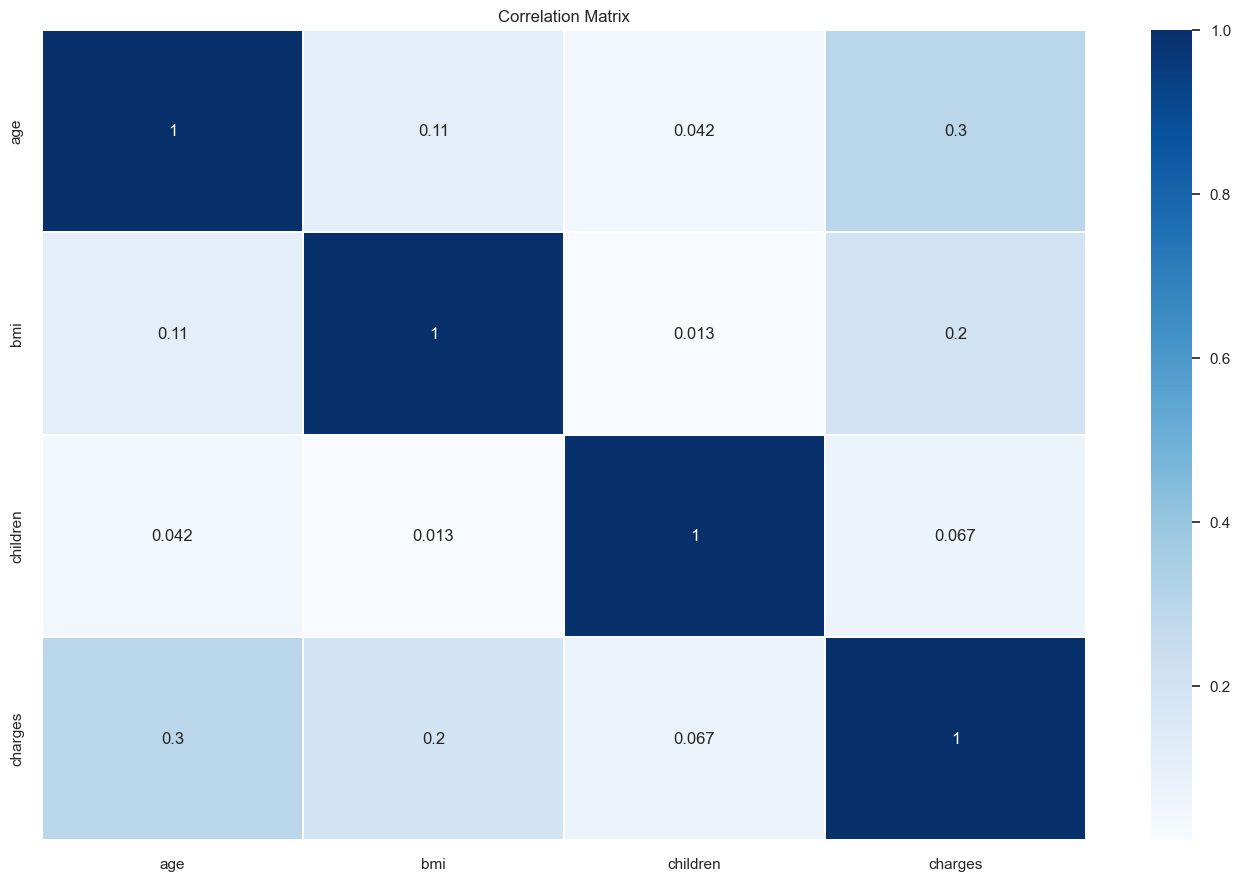

In [401]:
# Display the heatmap to get the relationships between data features 
sns.set(rc={"figure.figsize":(15,10)})
plt.title("Correlation Matrix")
sns.heatmap(df.corr(), annot=True , linewidths = 0.2, cmap = 'Blues')

## Feature Engineering

Create new columns in order to use in EDA

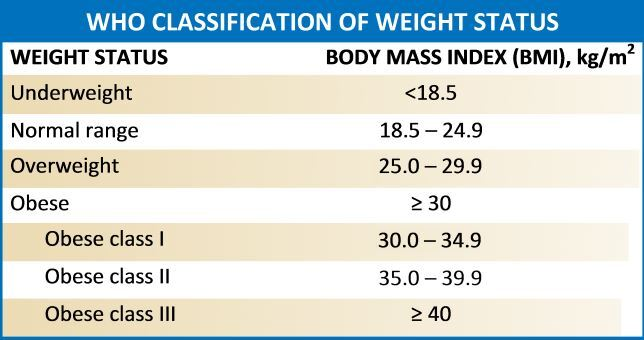



WHO classification of weight status. Adopted from the World Health Organization; 1998 report.



In [525]:
# Feature Engineering: create a new column as weight_status_4 in order to use for EDA   
status_4 = []
for i in df['bmi']:
    if i <18.5:
        status_4.append('underweight')
    elif 18.5<= i  < 25:
        status_4.append('normal_range') 
    elif 25.0<= i < 30:
        status_4.append('overweight') 
    elif 30.0<= i :
        status_4.append('obese') 
df['weight_status_4'] = status_4

In [526]:
# Feature Engineering:  create a new column as weight_status_6 in order to use for EDA 
status_6 = []
for i in df['bmi']:
    if i <18.5:
        status_6.append('underweight')
    elif 18.5<= i  < 25:
        status_6.append('normal_range') 
    elif 25.0<= i < 30:
        status_6.append('overweight') 
    elif 30.0<= i < 35:
        status_6.append('obese_class_I') 
    elif 35.0<= i < 40:
        status_6.append('obese_class_II') 
    elif 40.0<= i :
        status_6.append('obese_class_III') 
df['weight_status_6'] = status_6

# Exploratory Data Analysis

## Plot of categorical variables

The categorical variables are: sex, smoker, region, weight_status_4 and weight_status_6

In [527]:
df.columns # Display the columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'weight_status_4', 'weight_status_6'],
      dtype='object')

In [405]:
df["sex"].unique()

['female', 'male']
Categories (2, object): ['female', 'male']

The sex variable takes two values: 'female' and 'male'

In [406]:
df["sex"].value_counts()

male      675
female    662
Name: sex, dtype: int64

There are 662 females and 676 males

In [407]:
df["sex"].value_counts(normalize=True)

male      0.504862
female    0.495138
Name: sex, dtype: float64

50.48 % of dataset is male, 49.52 of dataset is female

Text(0.5, 1.0, 'Distribution of Gender')

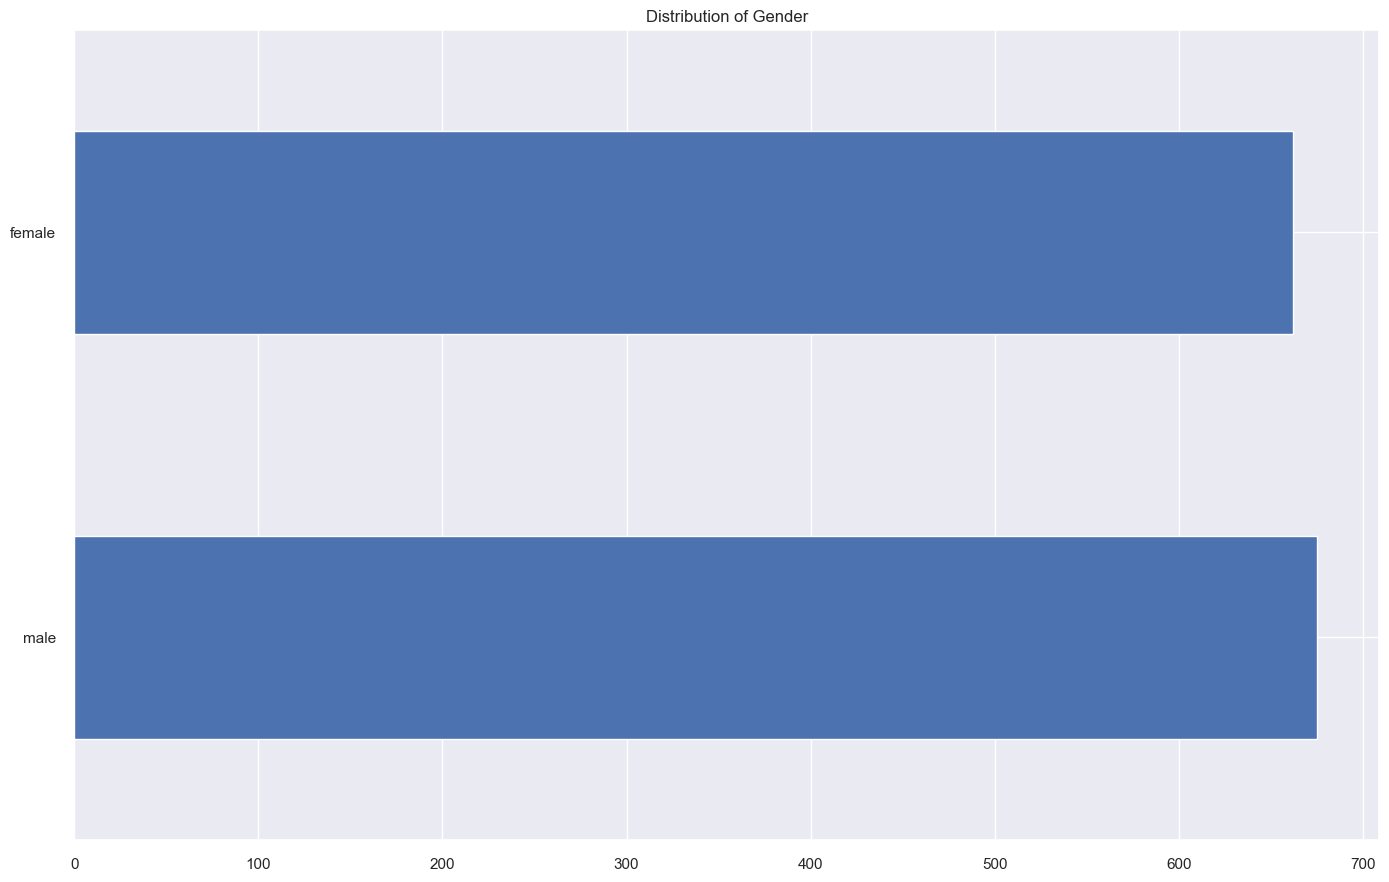

In [408]:
df["sex"].value_counts().plot.barh().set_title("Distribution of Gender") # Visualize the sex distribution

There are 662 females and 676 males

In [409]:
df["smoker"].unique()

['yes', 'no']
Categories (2, object): ['no', 'yes']

The smoker variable takes two values: 'yes' and 'no'

In [410]:
df["smoker"].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

There are 1064 non-smokers and 274 smokers

In [412]:
df["smoker"].value_counts(normalize=True)

no     0.795064
yes    0.204936
Name: smoker, dtype: float64

79.51 % of dataset is non-smoker, 20.49 of dataset is smoker

Text(0.5, 1.0, 'Distribution of Smoker')

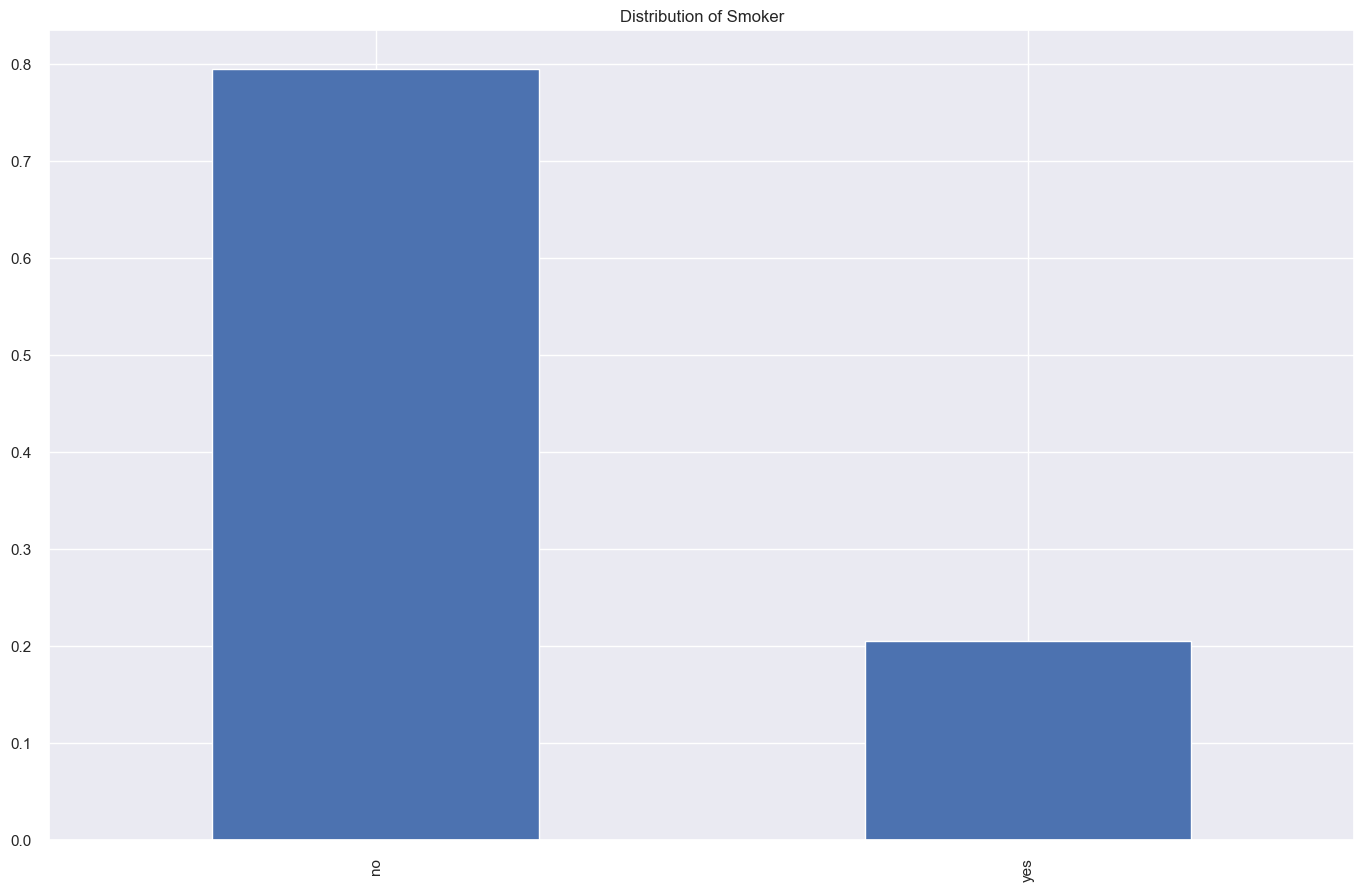

In [414]:
df["smoker"].value_counts(normalize=True).plot.bar().set_title("Distribution of Smoker")  # Visualize the smoker distribution

In [415]:
df["region"].unique()

['southwest', 'southeast', 'northwest', 'northeast']
Categories (4, object): ['northeast', 'northwest', 'southeast', 'southwest']

The region variable takes four values: southwest, southeast, northwest and northeast

In [416]:
df["region"].value_counts()

southeast    364
southwest    325
northeast    324
northwest    324
Name: region, dtype: int64

There are 364 of southeast.
There are 325 of northwest
There are 324 of northeast.
There are 325 of southwest

In [417]:
df["region"].value_counts(normalize=True)

southeast    0.272251
southwest    0.243082
northeast    0.242334
northwest    0.242334
Name: region, dtype: float64

27.22 % of dataset is southeast, 24.30 % of dataset is southwest, 24.23 % of dataset is northeast, 24.23 % of dataset is northwest

Text(0.5, 1.0, 'Distribution of Region')

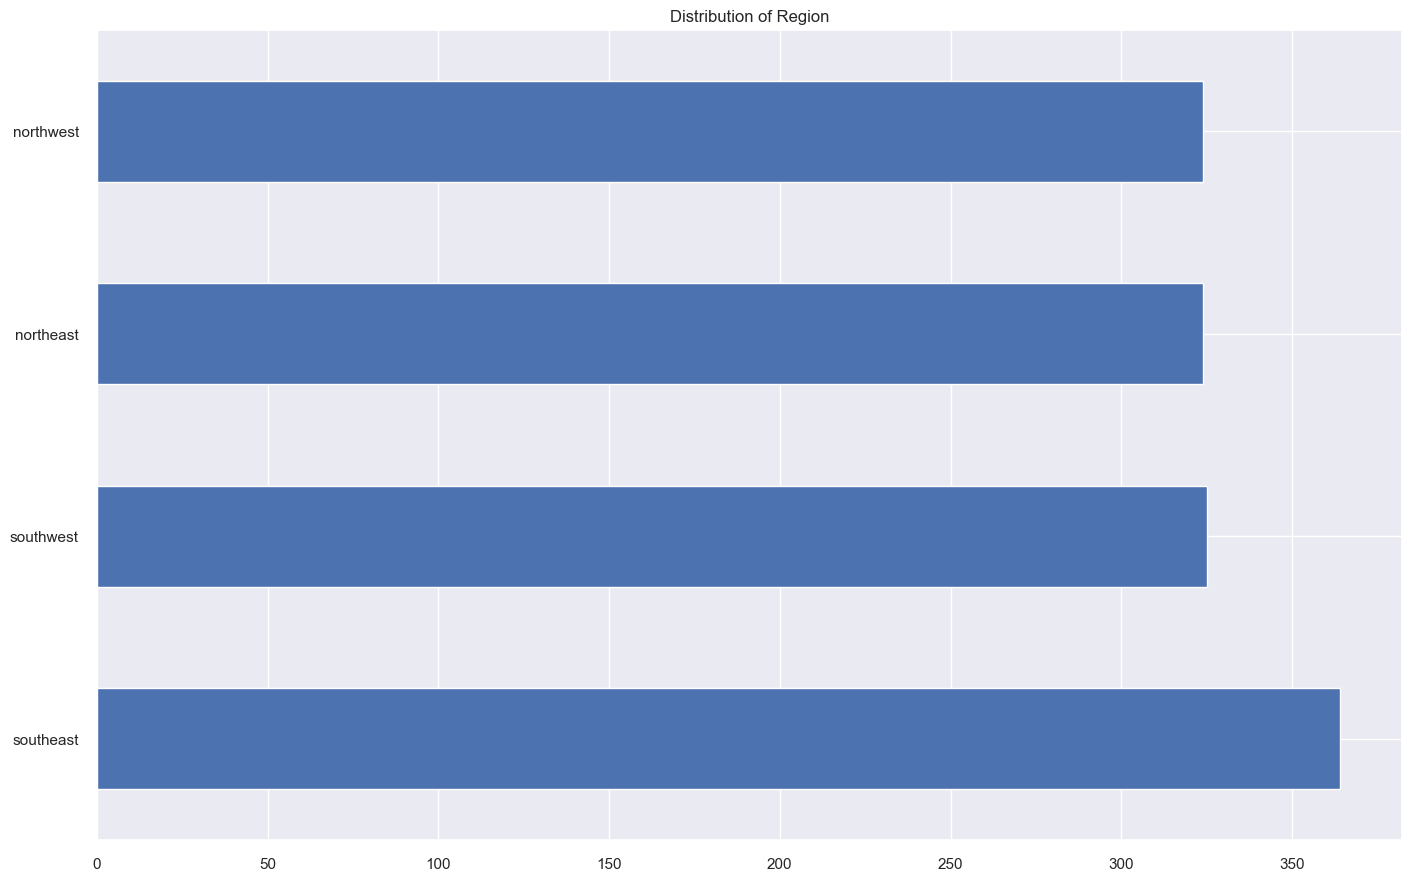

In [418]:
df["region"].value_counts().plot.barh().set_title("Distribution of Region")  # Visualize the region distribution

In [419]:
df["weight_status_4"].unique()

array(['overweight', 'obese', 'normal_range', 'underweight'], dtype=object)

The weight_status_4 variable takes four values: overweight, obese, normal_range and underweight

In [420]:
df["weight_status_4"].value_counts() # To get a weight_status_4 Series containing counts of unique values 

obese           706
overweight      386
normal_range    225
underweight      20
Name: weight_status_4, dtype: int64

There are 706 of obese.
There are 386 of overweight.
There are 225 of normal_range.
There are 20 of underweight.

In [421]:
df["weight_status_4"].value_counts(normalize=True) # To get a weight_status_4 Series containing percentage of unique values 

obese           0.528048
overweight      0.288706
normal_range    0.168287
underweight     0.014959
Name: weight_status_4, dtype: float64

52.80 % of dataset is obese, 28.87% of dataset is overweight, 16.82 % of dataset is normal_range, 1.49 % of dataset is underweight.

Text(0.5, 1.0, 'Distribution of Weight Status with 4 Classes')

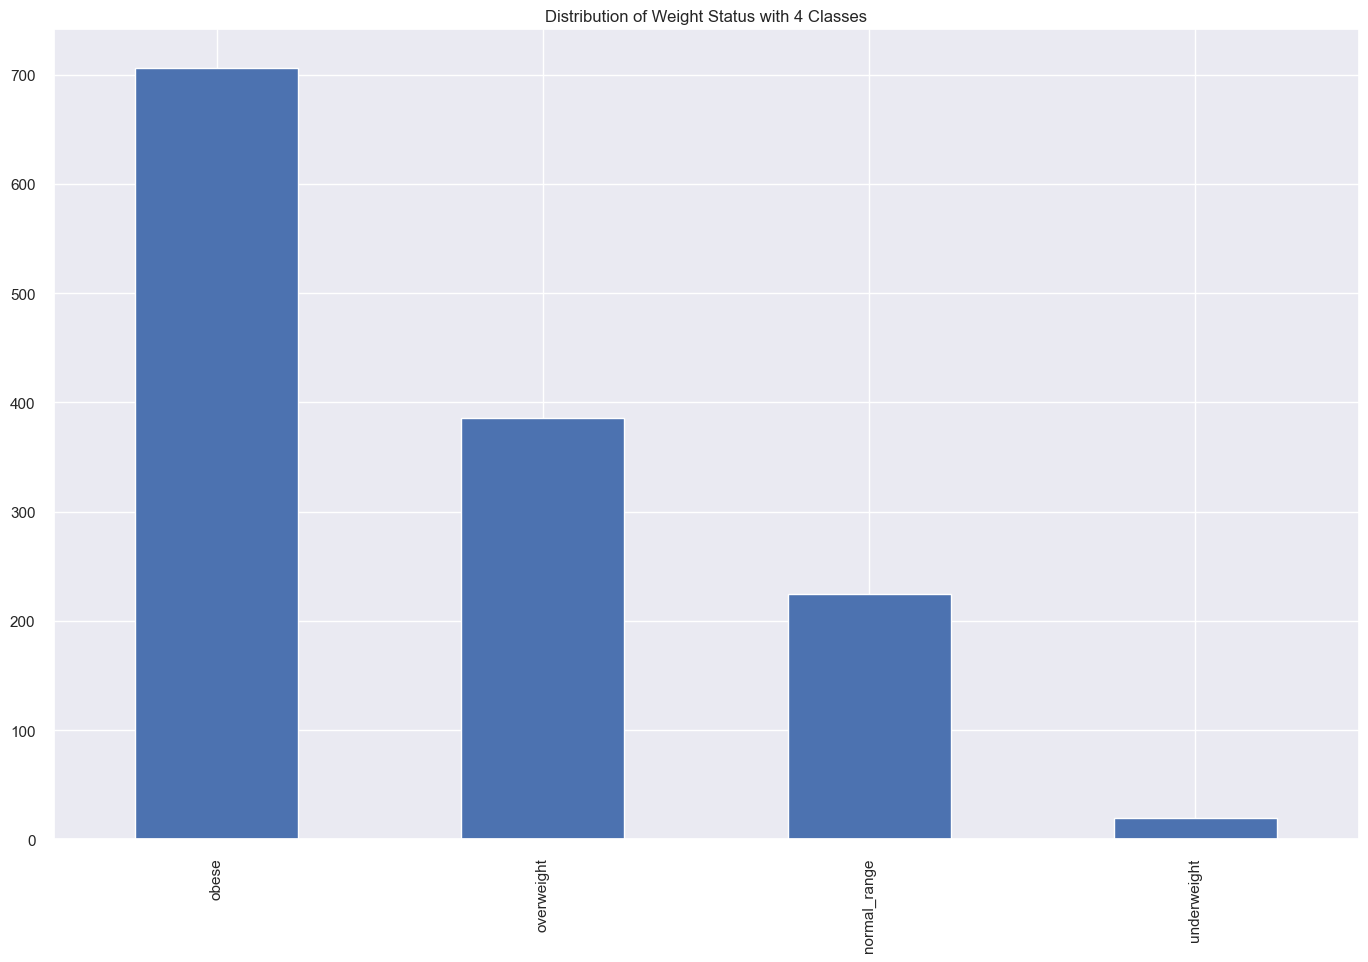

In [422]:
df["weight_status_4"].value_counts().plot.bar().set_title("Distribution of Weight Status with 4 Classes")  # Visualize the Weight Status with 4 Classes distribution

In [423]:
df["weight_status_6"].unique()

array(['overweight', 'obese_class_I', 'normal_range', 'obese_class_II',
       'obese_class_III', 'underweight'], dtype=object)

The weight_status_6 variable takes four values: overweight, obese_class_I, normal_range, obese_class_II, obese_class_III and underweight

In [424]:
df["weight_status_6"].value_counts() # To get a weight_status_6 Series containing counts of unique values 

obese_class_I      390
overweight         386
normal_range       225
obese_class_II     225
obese_class_III     91
underweight         20
Name: weight_status_6, dtype: int64

There are 390 of obese_class_I.
There are 386 of overweight.
There are 225 of normal_range.
There are 225 of obese_class_II.
There are 91 of obese_class_II.
There are 20 of underweight.

In [425]:
df["weight_status_6"].value_counts(normalize=True) # To get a weight_status_6 Series containing percentage of unique values 

obese_class_I      0.291698
overweight         0.288706
normal_range       0.168287
obese_class_II     0.168287
obese_class_III    0.068063
underweight        0.014959
Name: weight_status_6, dtype: float64

29.16 % of dataset is obese_class_I, 28.87% of dataset is overweight, 16.82 % of dataset is normal_range, 16.82 % of dataset is obese_class_II, 6.80 % of dataset is obese_class_III,  1.49 % of dataset is underweight.

Text(0.5, 1.0, 'Distribution of Weight Status with 6 Classes')

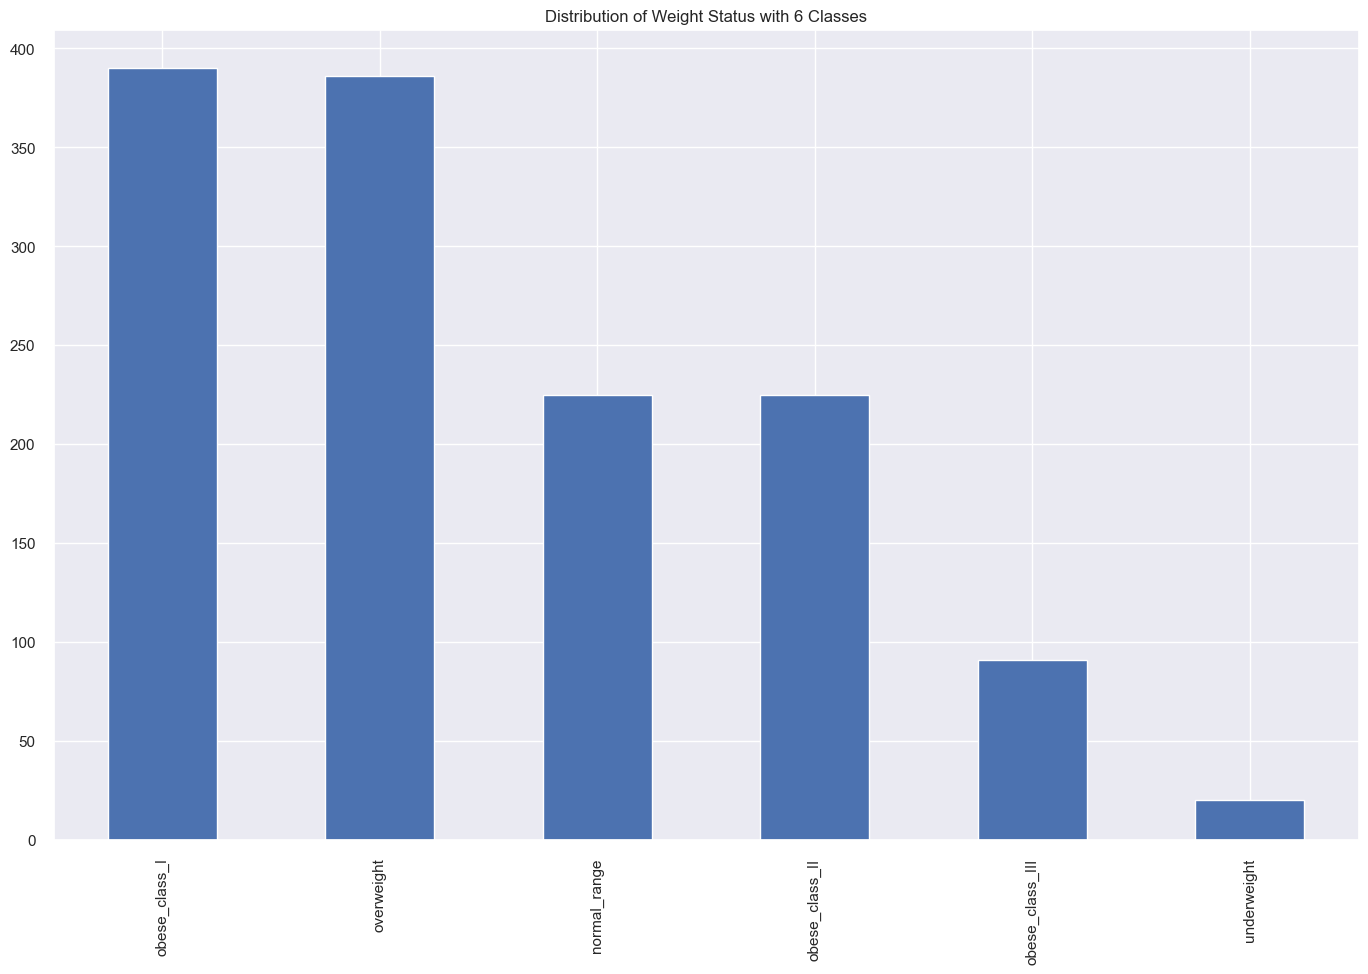

In [426]:
df["weight_status_6"].value_counts().plot.bar().set_title("Distribution of Weight Status with 6 Classes") # Visualize the Weight Status with 6 Classes distribution

## Plot of numerical variables

The numerical variables are: age, bmi, children and charges

In [427]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'weight_status_4', 'weight_status_6'],
      dtype='object')

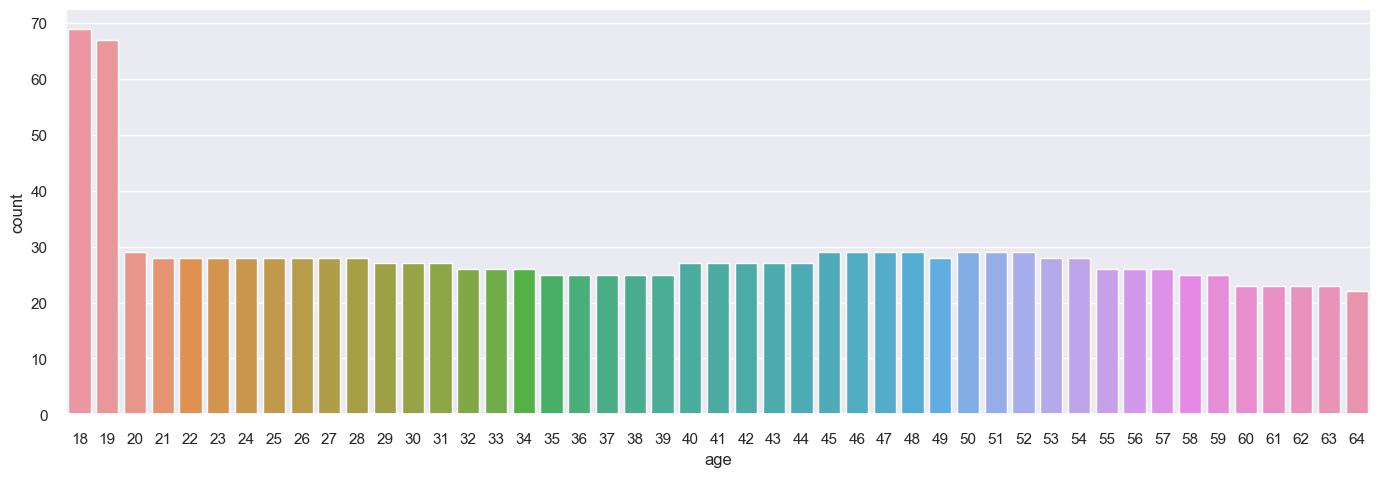

In [428]:
## Analyse age using count plot

plt.figure(figsize=(15,5))
sns.countplot(x='age',data=df)
plt.show()

<AxesSubplot: xlabel='age', ylabel='Count'>

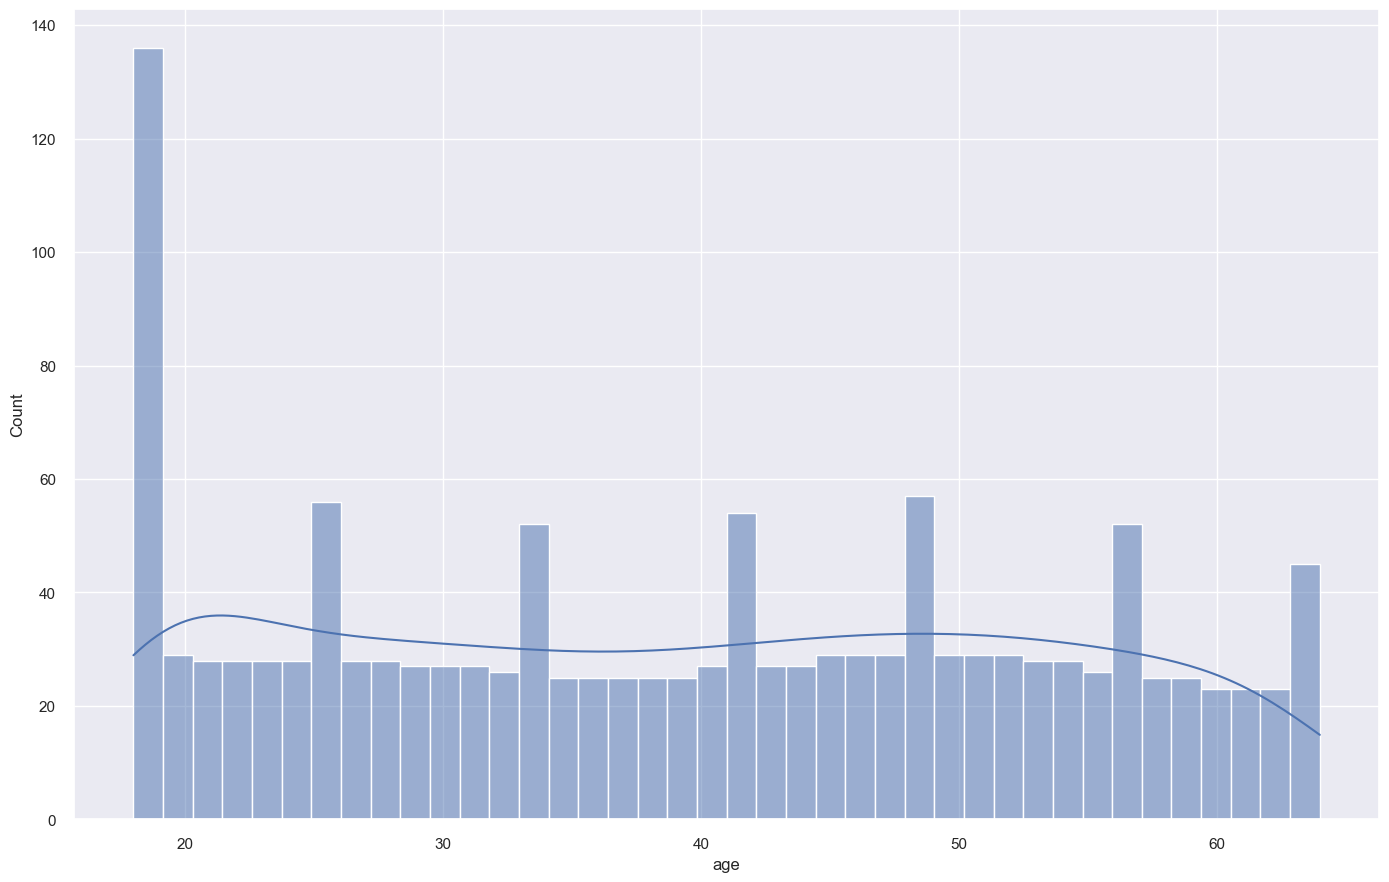

In [429]:
sns.histplot(df["age"], kde=True, bins=40) # Distribution of age

<AxesSubplot: xlabel='bmi', ylabel='Count'>

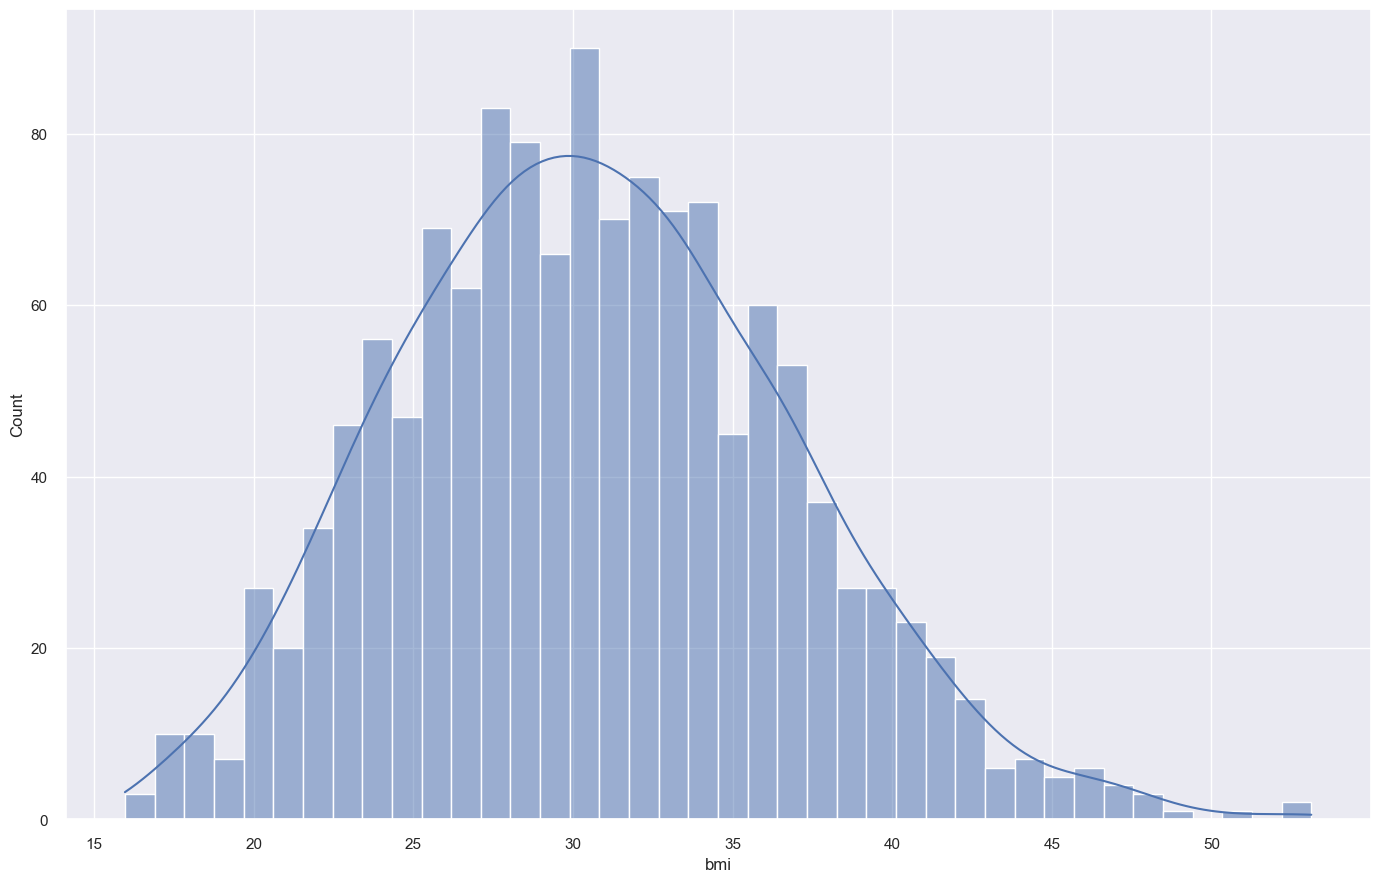

In [430]:
sns.histplot(df["bmi"], kde=True, bins=40) # Distribution of bmi

It looks like normal distribution. Majority of them is distributed around 30 bmi

<AxesSubplot: xlabel='charges', ylabel='Count'>

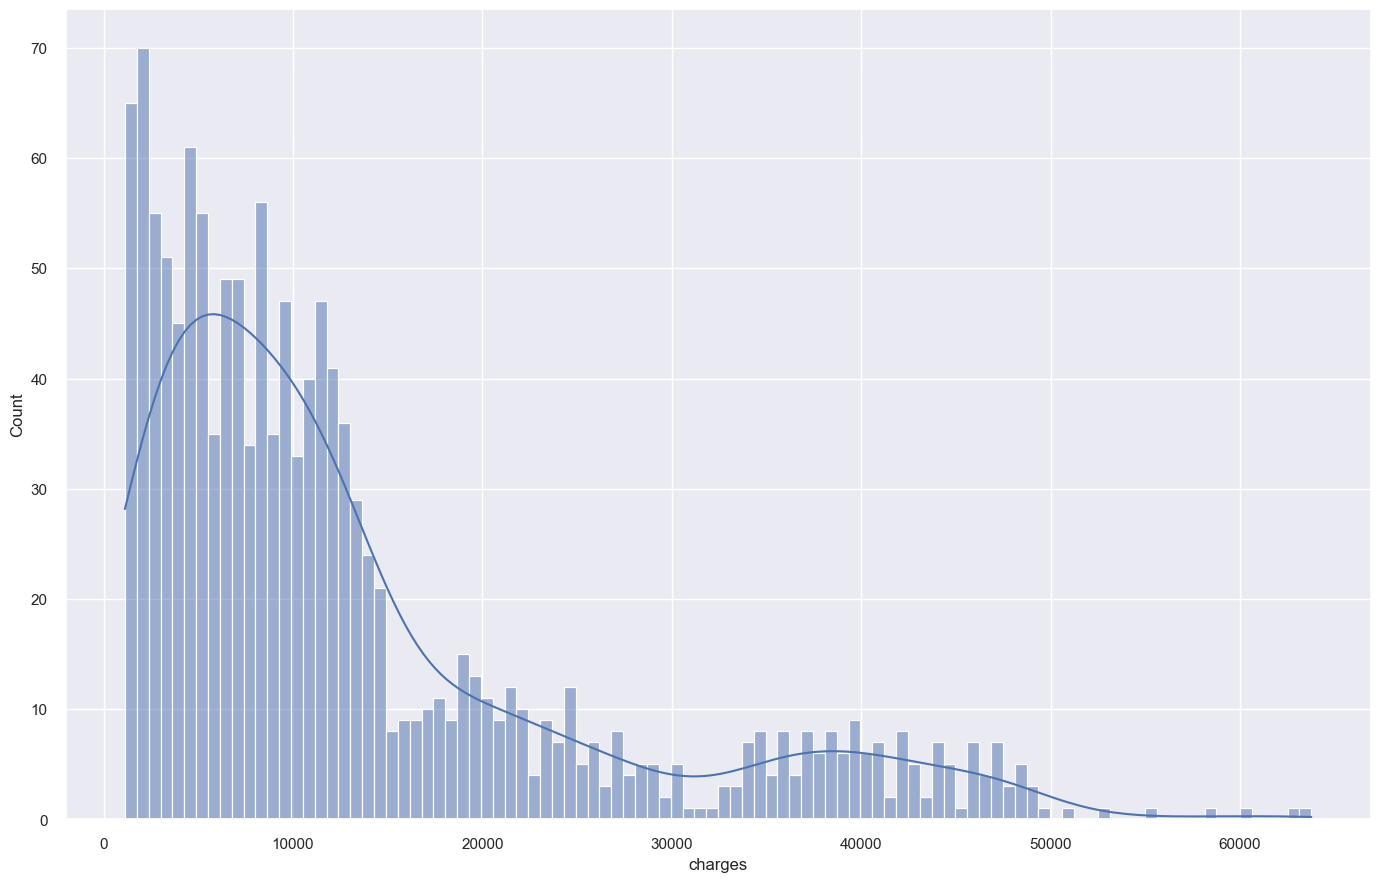

In [431]:
sns.histplot(df["charges"], kde=True, bins=100) # Distribution of charges

## Multivariate Analysis

<AxesSubplot: title={'center': 'Correlation Matrix'}>

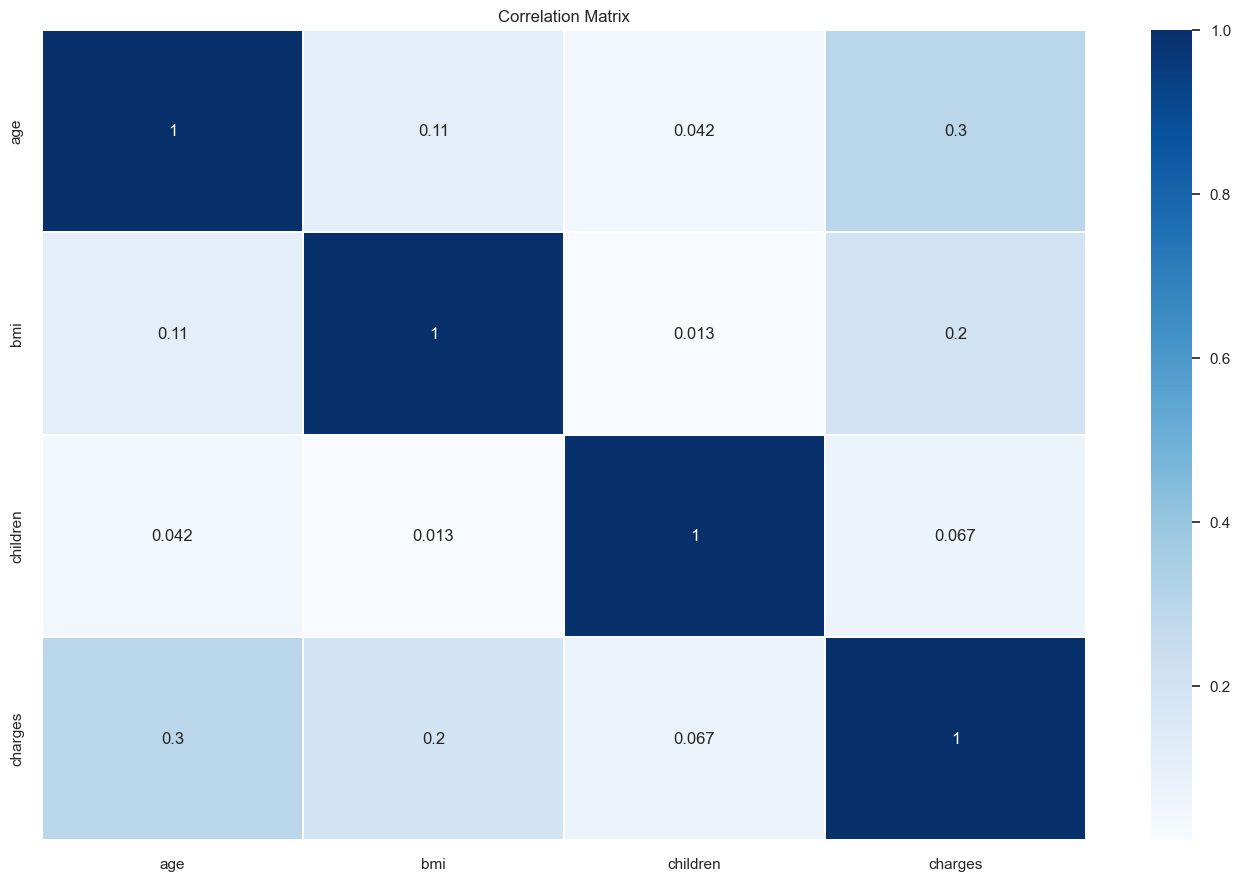

In [432]:
# Display the heatmap to get the relationships between data features 
sns.set(rc={"figure.figsize":(15,10)})
plt.title("Correlation Matrix")
sns.heatmap(df.corr(), annot=True , linewidths = 0.2, cmap = 'Blues')

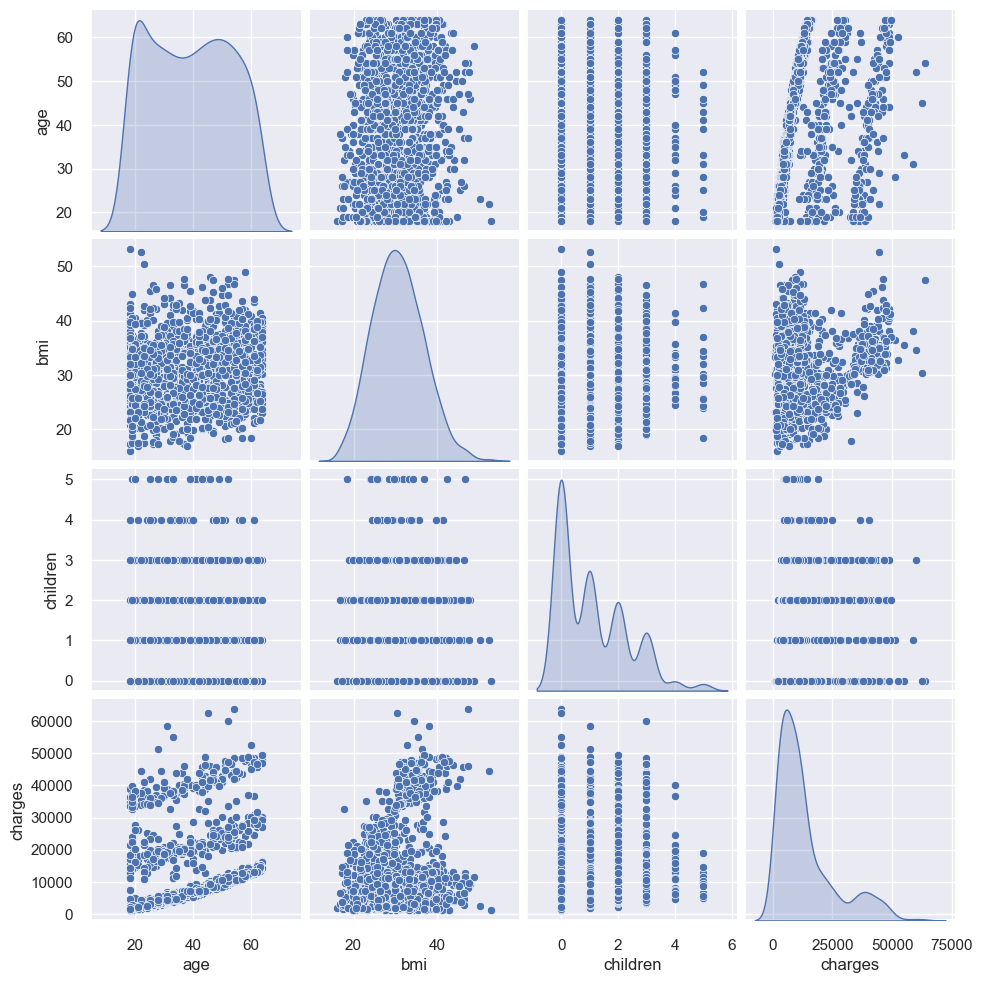

In [433]:
sns.pairplot(df, diag_kind='kde') # Visualize pairplot in order to examine the relationships

age is highly overall correlated with charges. smoker is highly overall correlated with charges

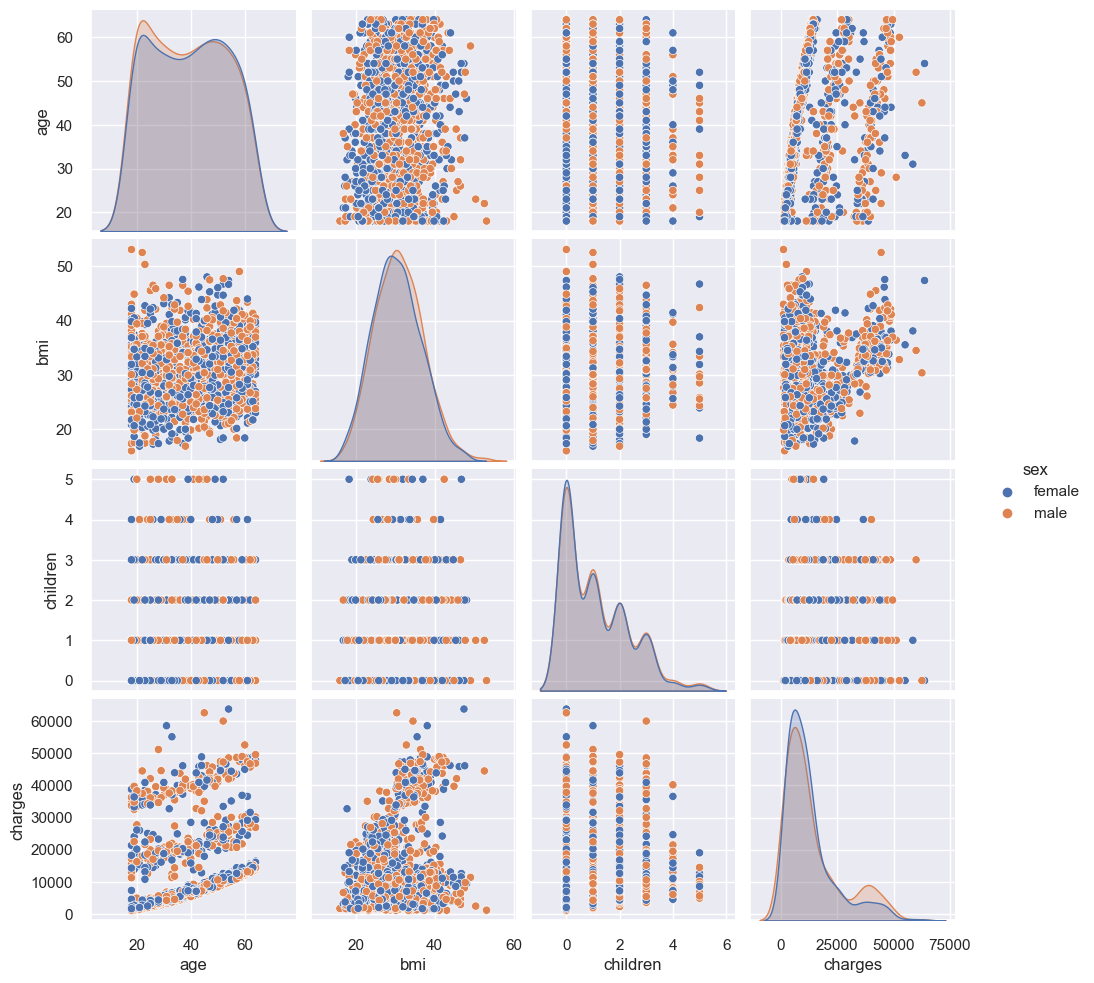

In [434]:
sns.pairplot(df,hue="sex"); # Visualize pairplot in order to examine the relationships based on the sex column

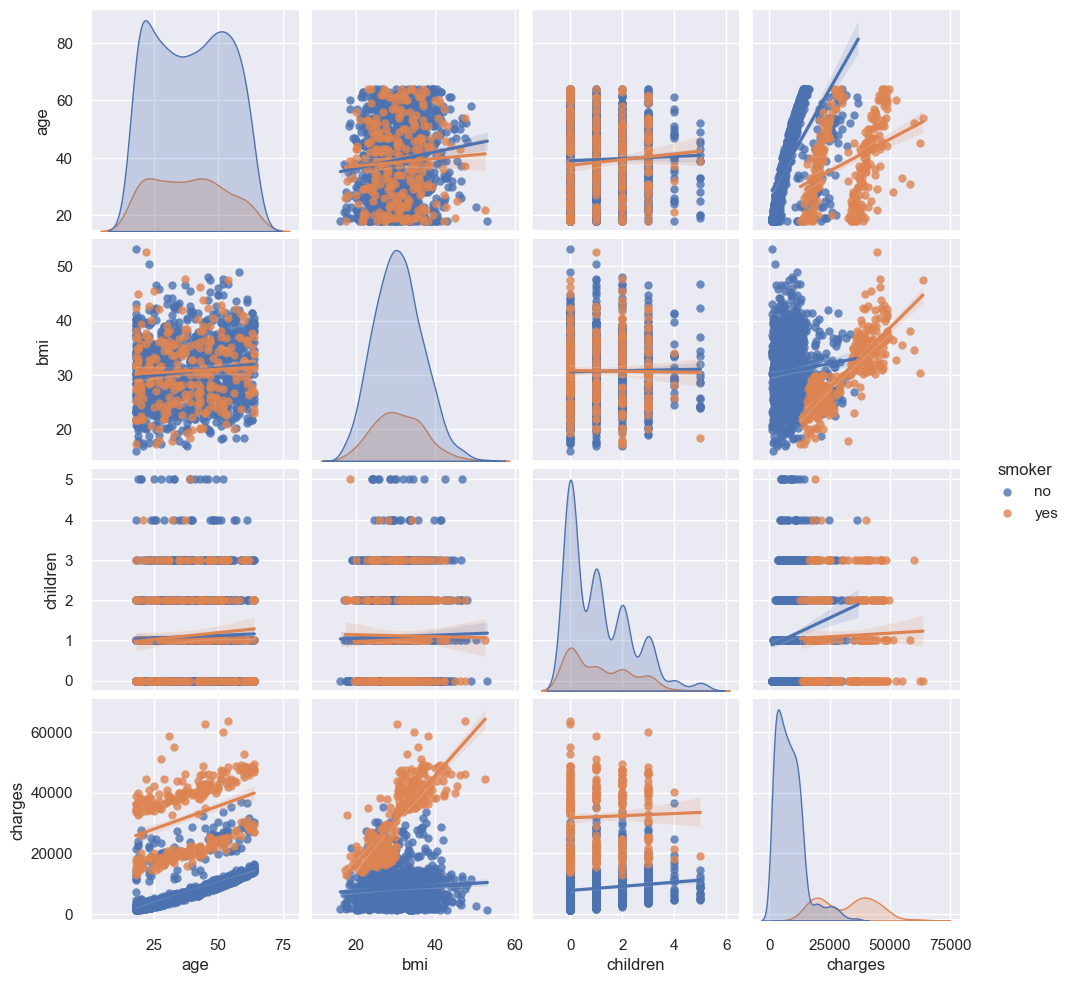

In [435]:
sns.pairplot(df,kind="reg",hue="smoker");  # Visualize pairplot in order to examine the relationships based on the smoker column using reg

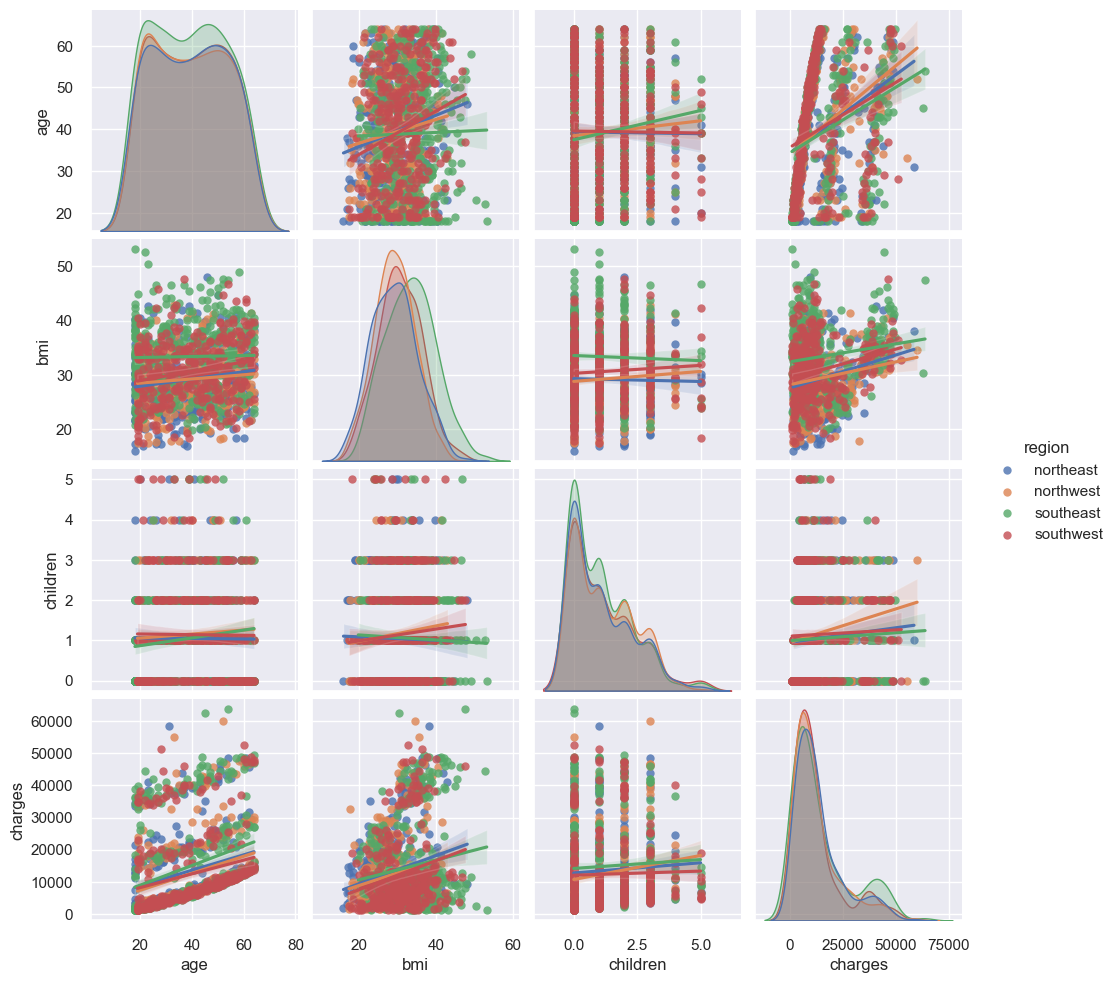

In [436]:
sns.pairplot(df,kind="reg",hue="region"); # Visualize pairplot in order to examine the relationships based on region column ysing reg

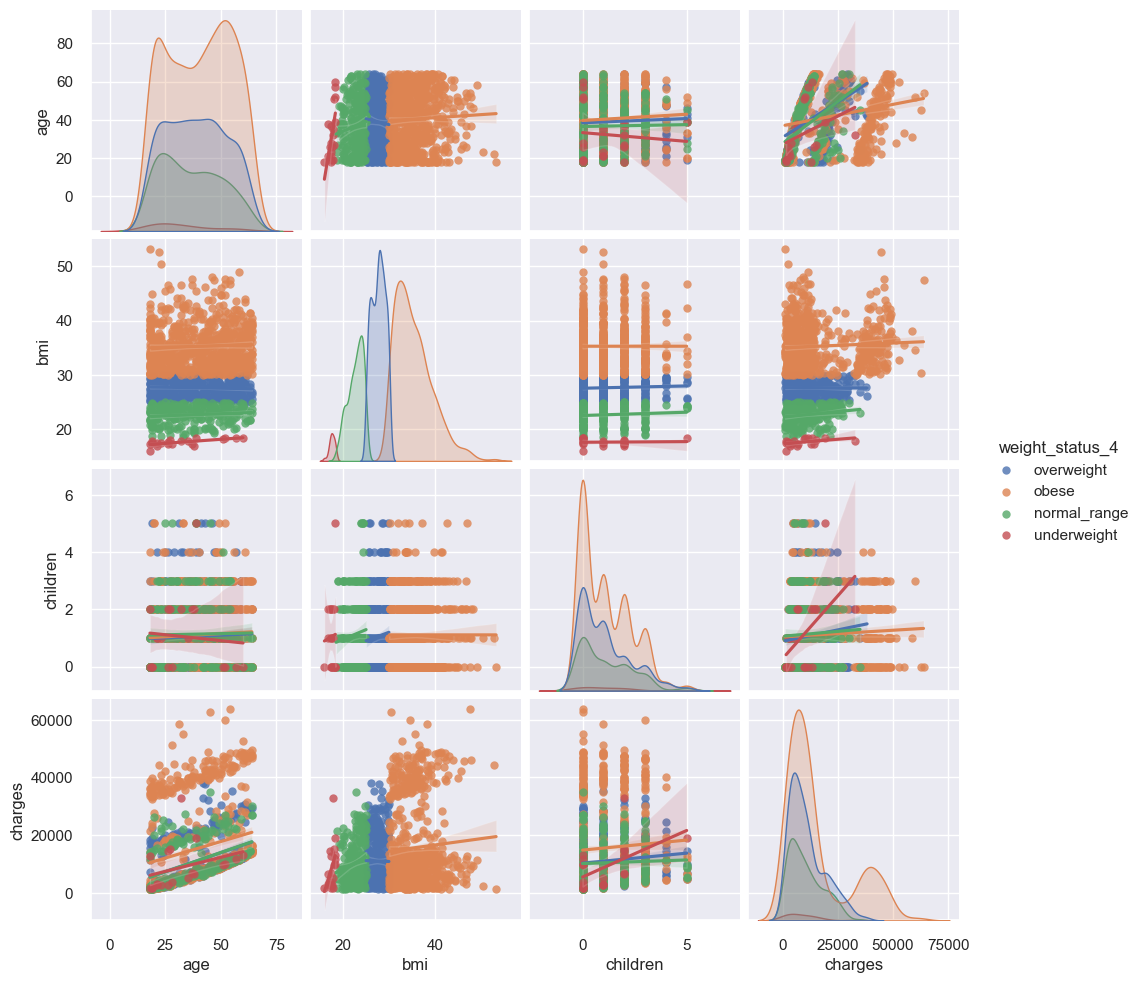

In [437]:
sns.pairplot(df,kind="reg",hue="weight_status_4"); # Visualize pairplot in order to examine the relationships based on weight_status_4 column

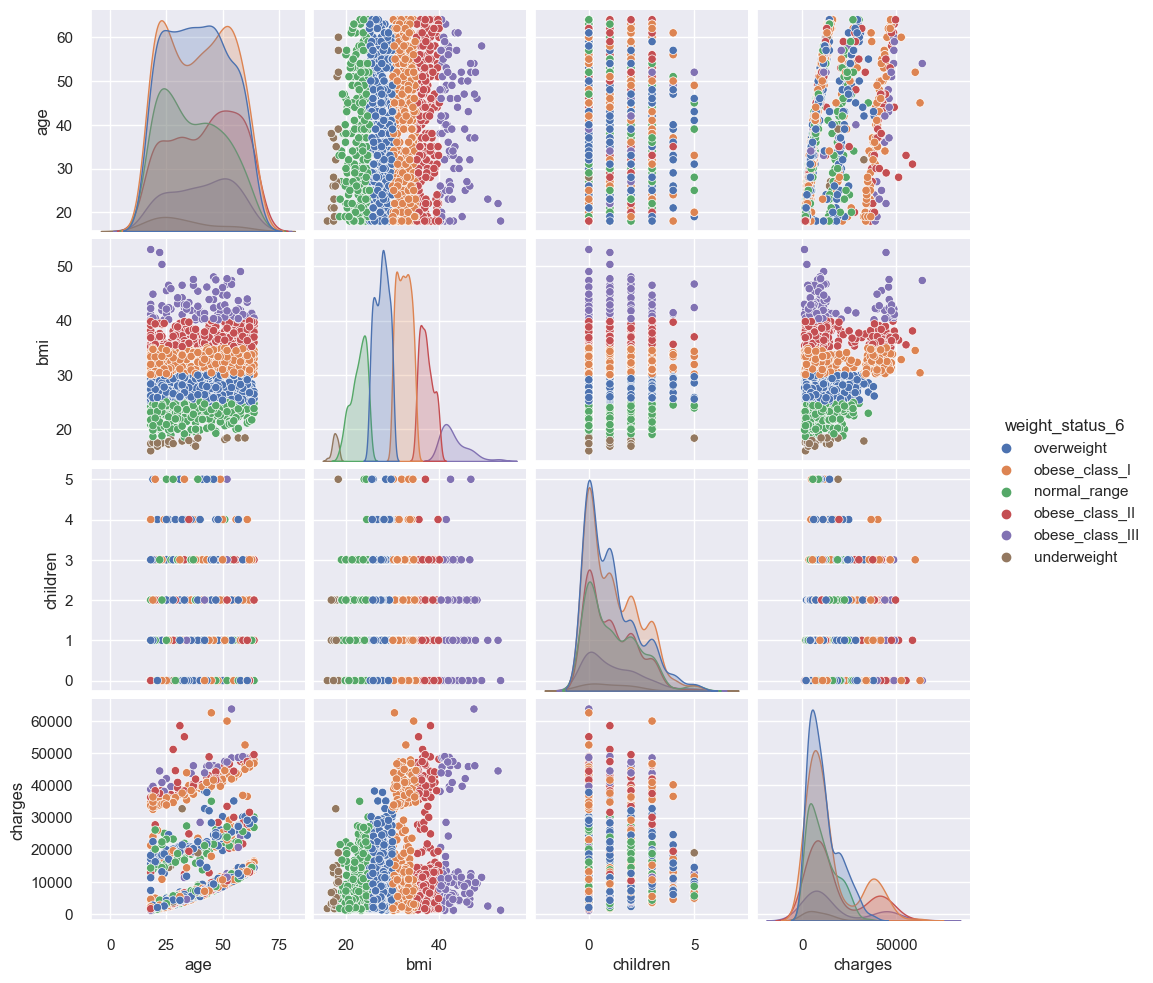

In [438]:
sns.pairplot(df,hue="weight_status_6"); # Visualize pairplot in order to examine the relationships based on weight_status_6 column

##  Scatterplot

<AxesSubplot: xlabel='age', ylabel='charges'>

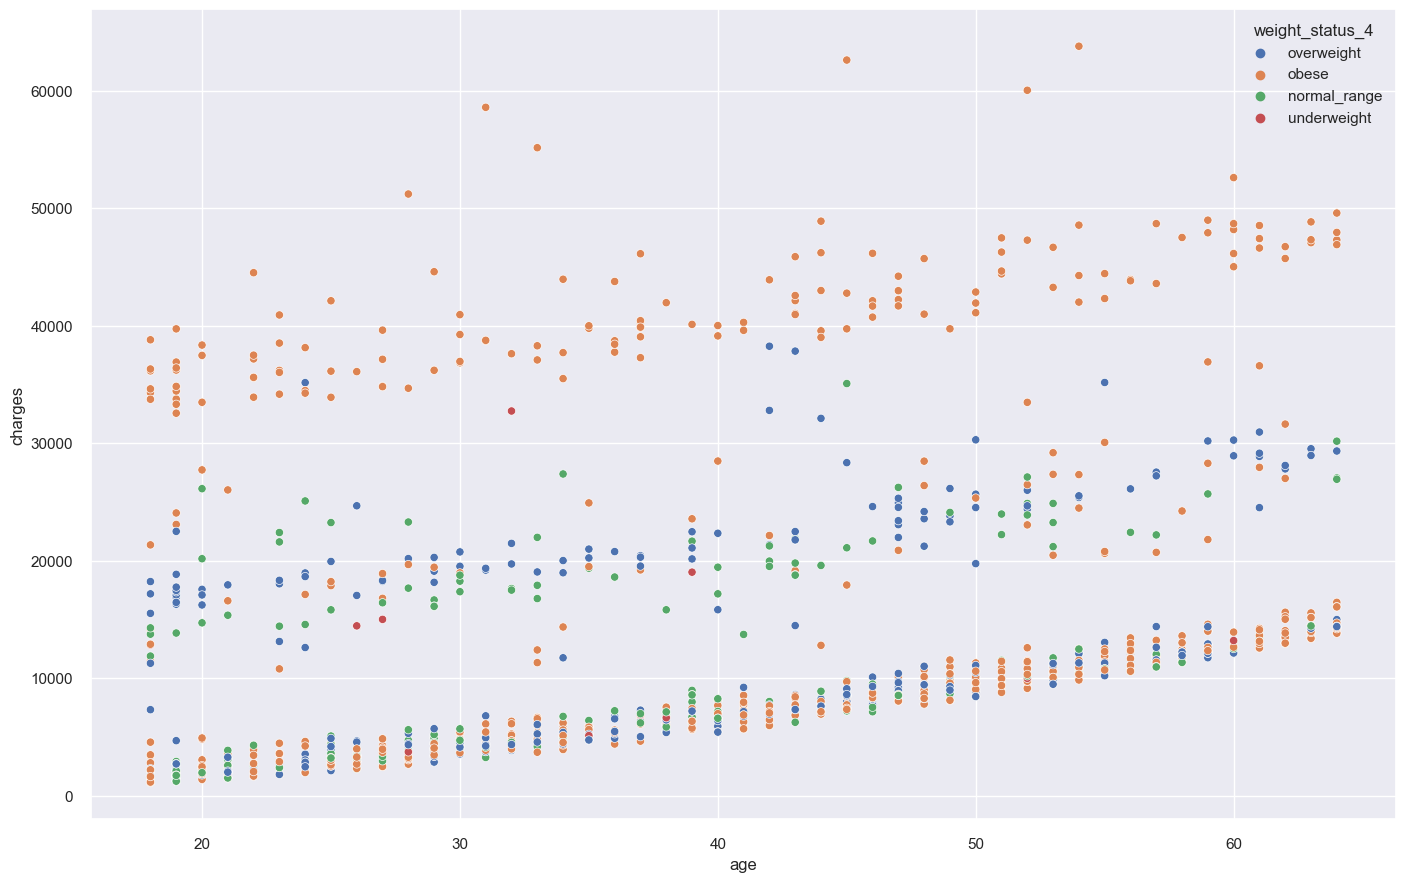

In [439]:
sns.scatterplot(x = 'age', y = 'charges', hue = 'weight_status_4', data = df)

<AxesSubplot: xlabel='age', ylabel='charges'>

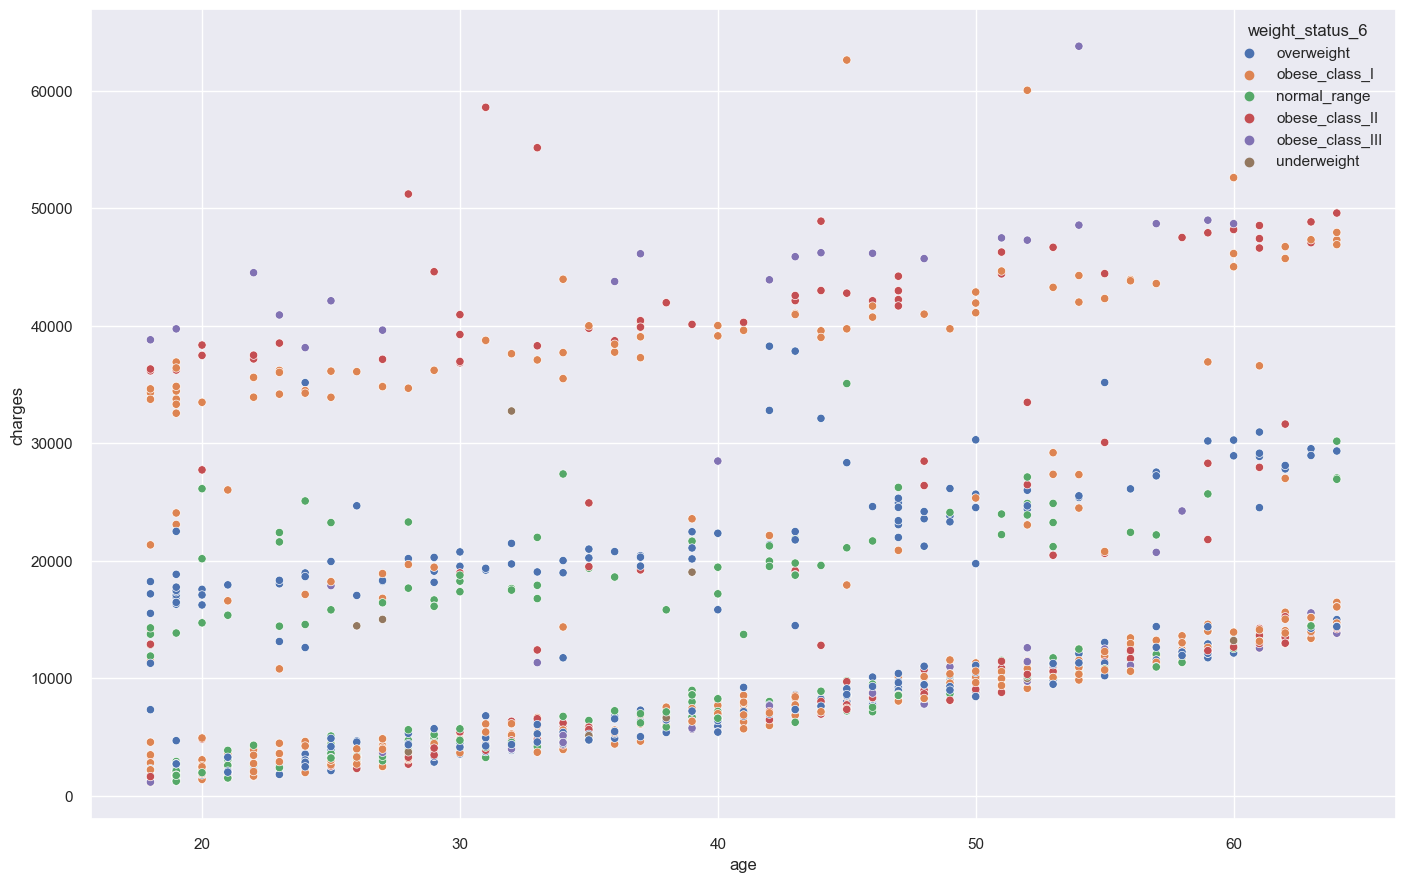

In [440]:
sns.scatterplot(x = 'age', y = 'charges', hue = 'weight_status_6', data = df)

<AxesSubplot: xlabel='age', ylabel='charges'>

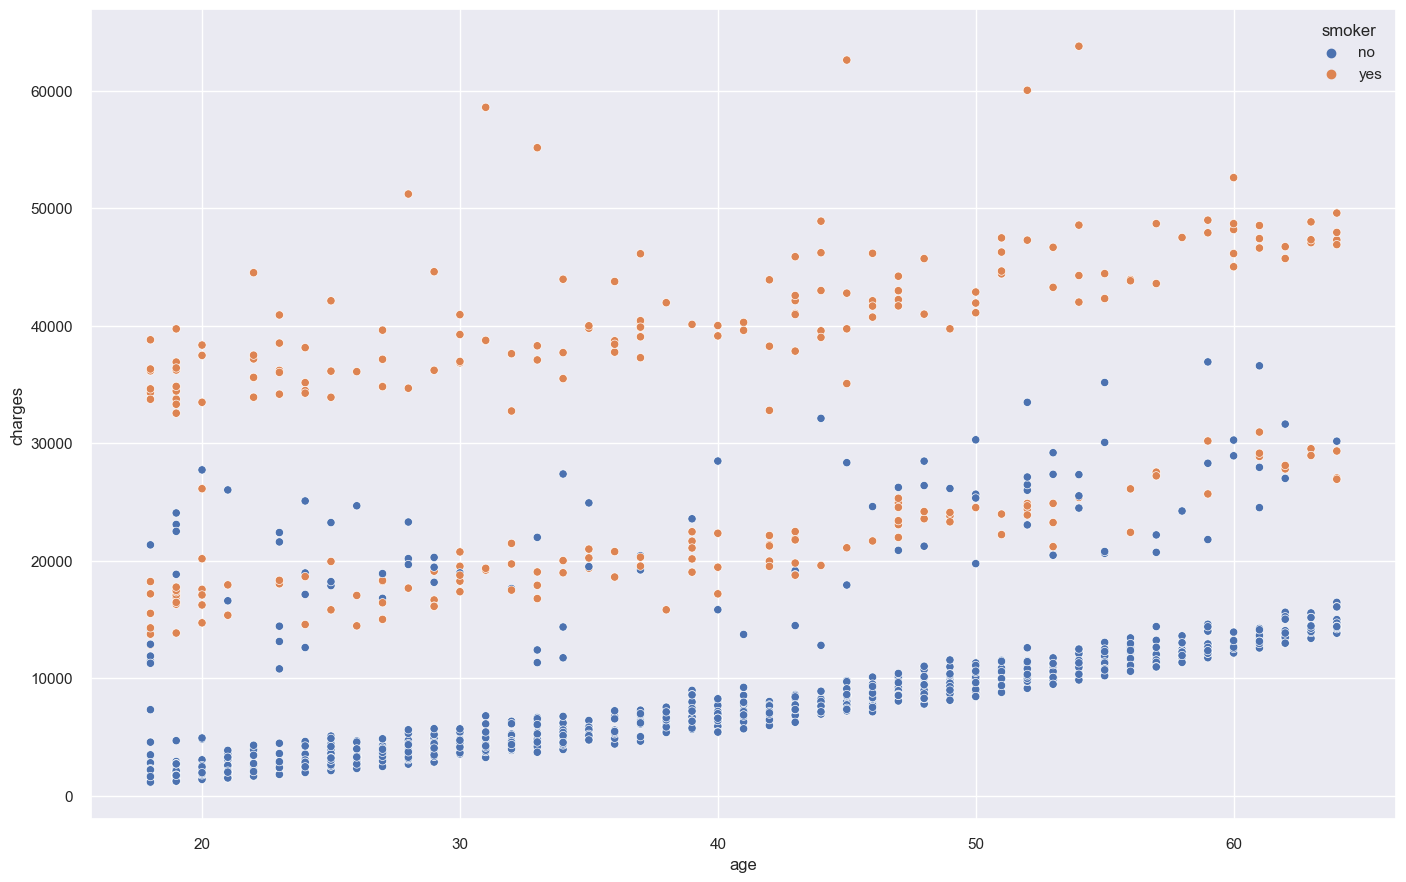

In [441]:
sns.scatterplot(x = 'age', y = 'charges', hue = 'smoker', data = df)

<AxesSubplot: xlabel='bmi', ylabel='charges'>

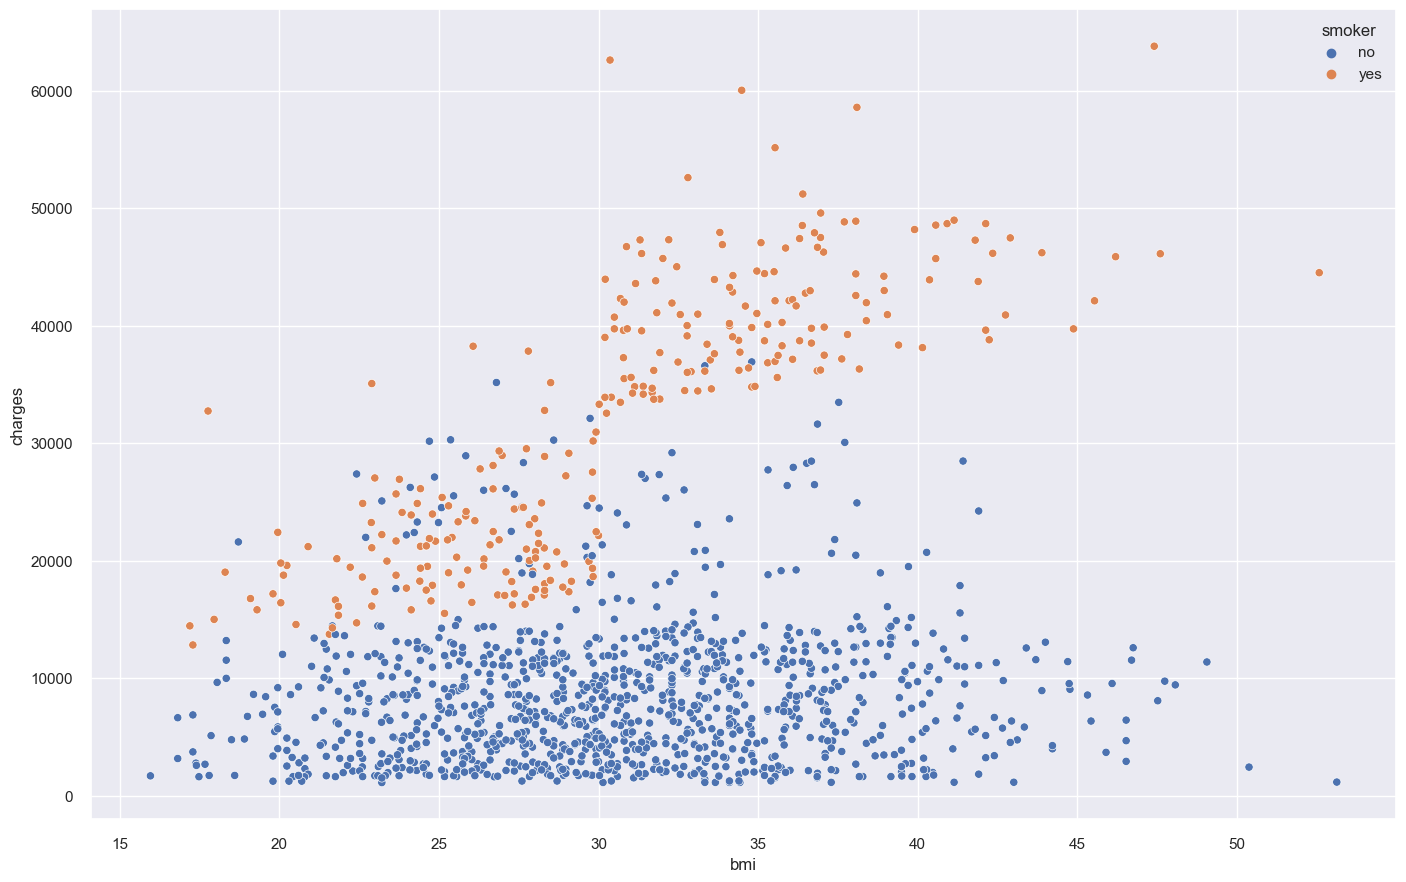

In [442]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = df)

## Relationships

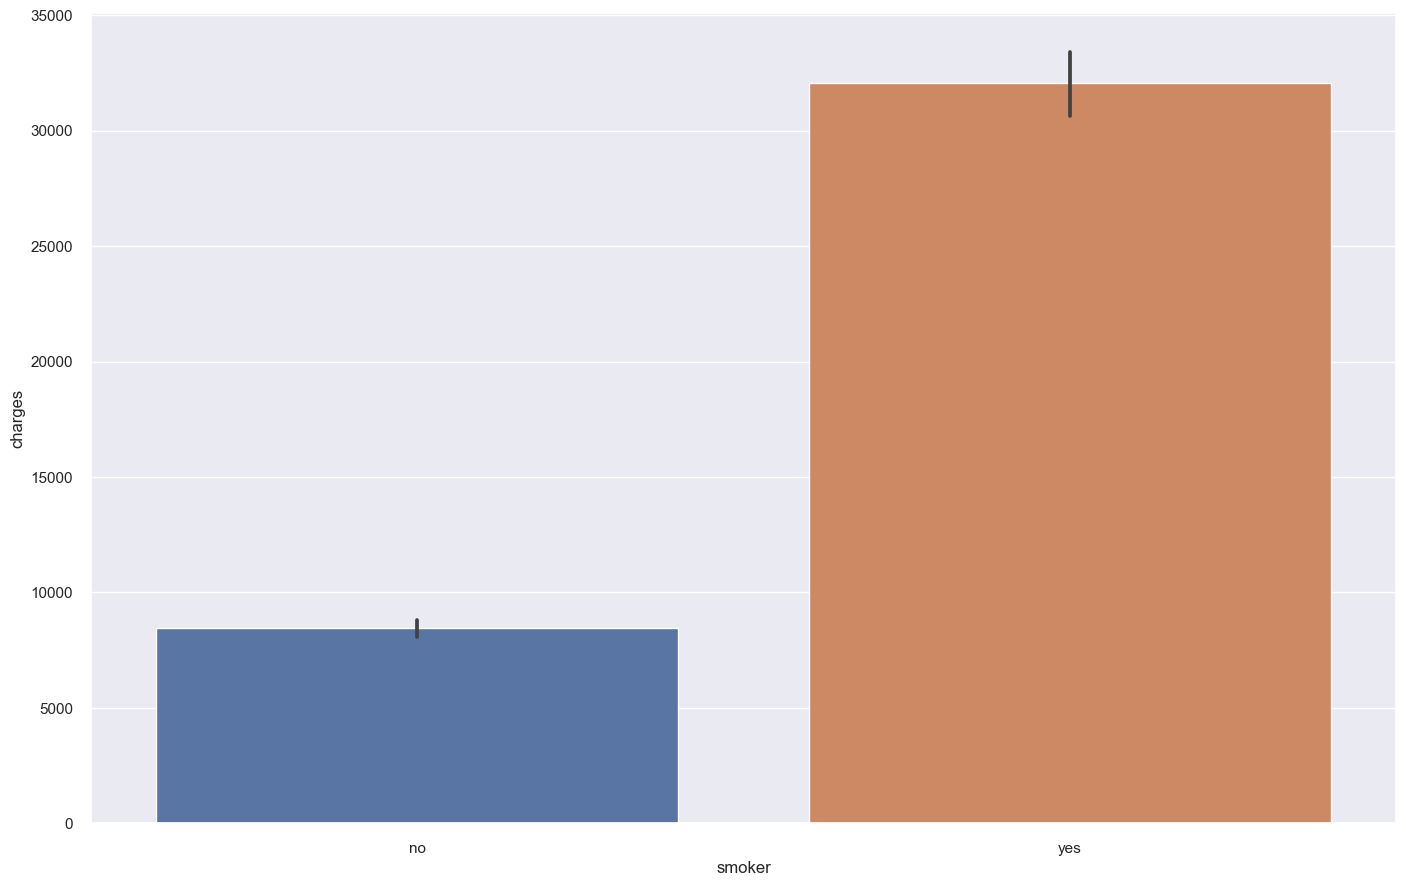

In [443]:
# Examine the relationship between “smoker” and “charges"
smoker = df["smoker"]
charges = df["charges"]
sns.barplot(x=smoker, y=charges, data=df); 

<AxesSubplot: xlabel='smoker', ylabel='charges'>

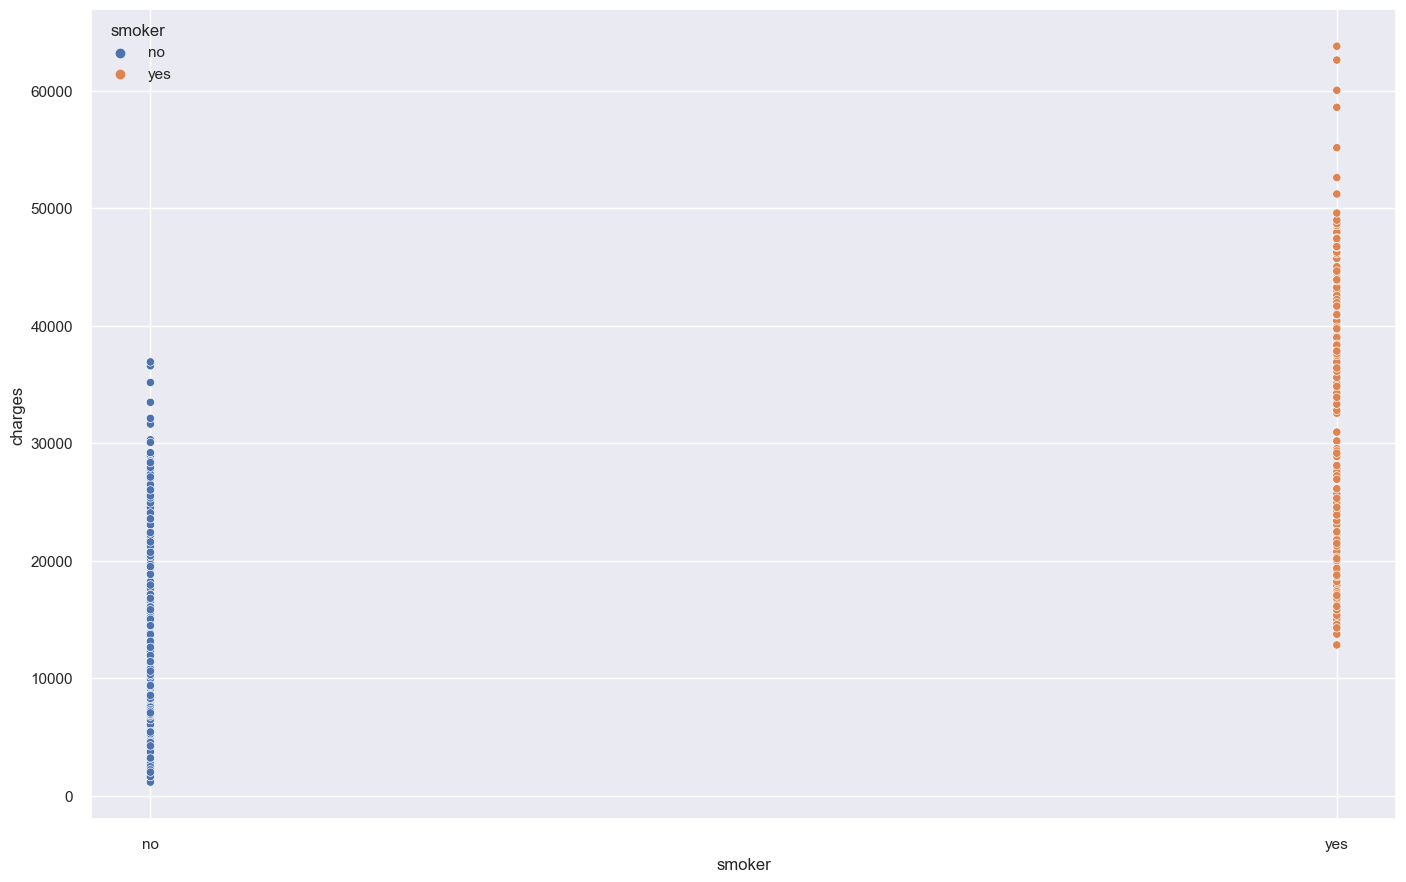

In [444]:
sns.scatterplot(x = 'smoker', y = 'charges', hue = 'smoker', data = df)

 Charges value of smokers is quite high. Smoking affects their insurance charge.

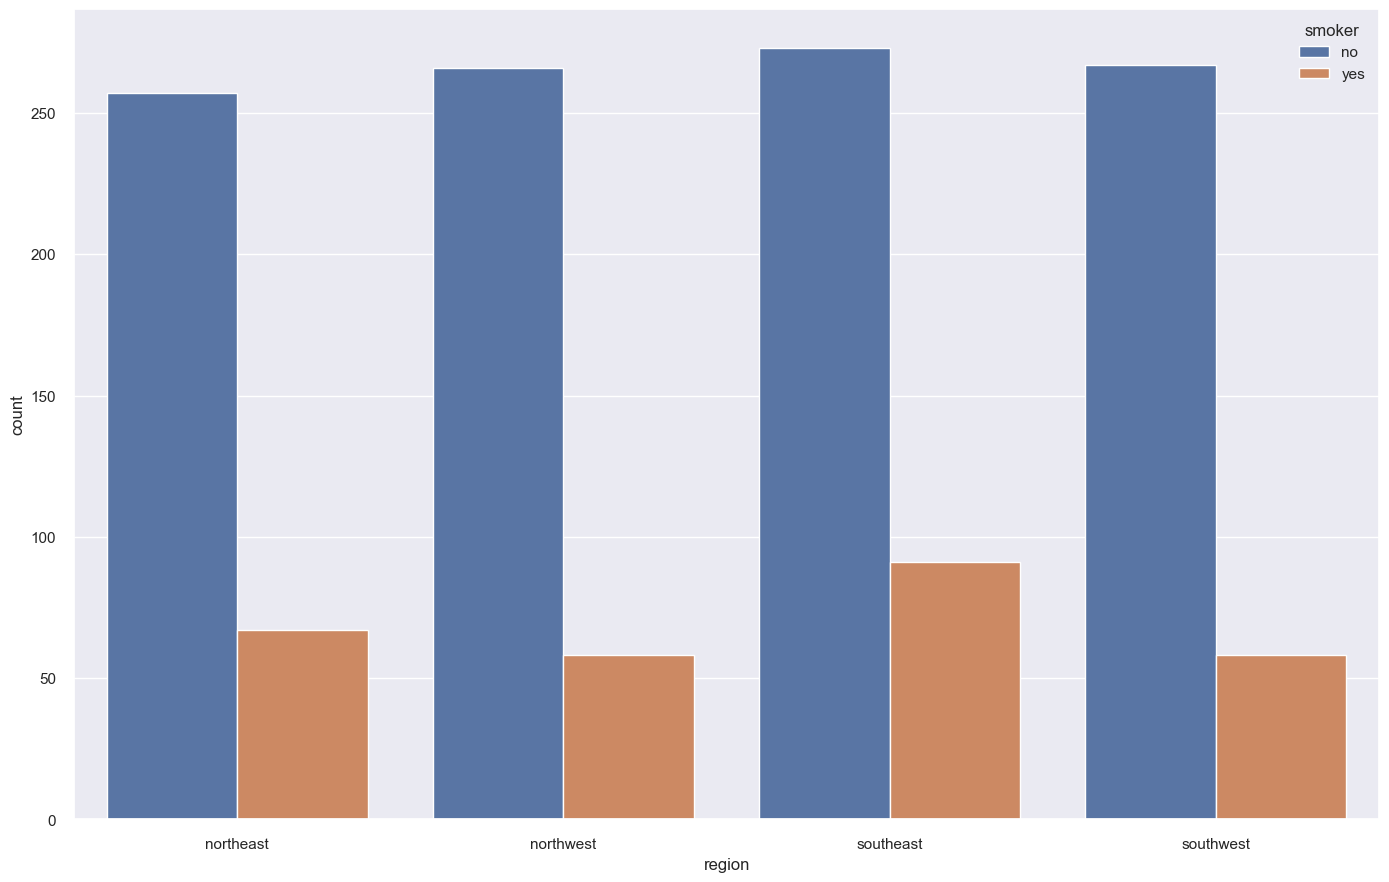

In [445]:
# Examine the relationship between “smoker” and “region”.

sns.countplot(data=df, x="region", hue="smoker");

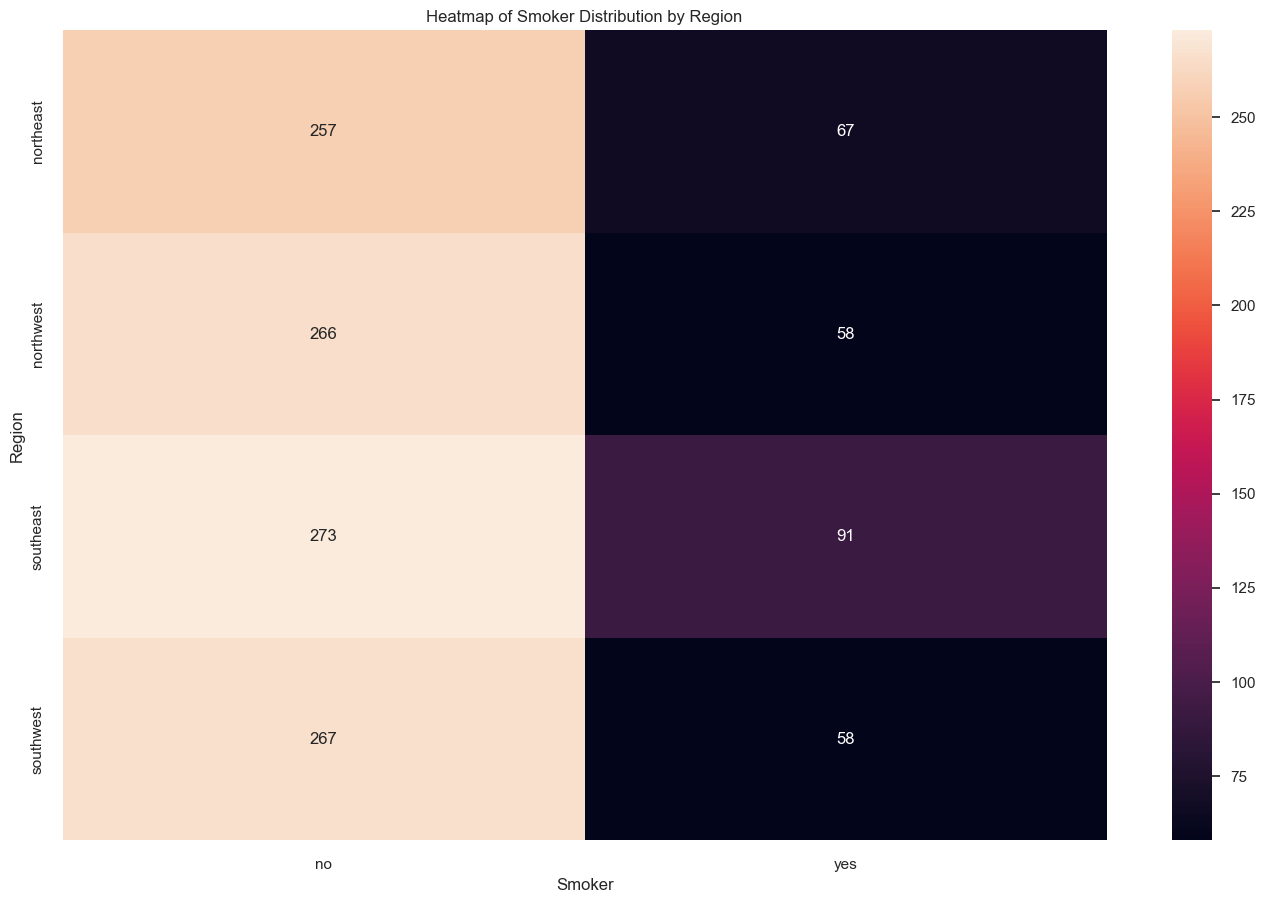

In [446]:
# Examine the relationship between “smoker” and “region” by using pivot table and heatmap
df_pivot = df.pivot_table(index="region", columns="smoker", aggfunc="size", fill_value=0)
sns.heatmap(df_pivot, annot=True, fmt="d")
plt.xlabel("Smoker")
plt.ylabel("Region")
plt.title("Heatmap of Smoker Distribution by Region")
plt.show()

Southeast has the most smokers (91) between regions. Northeast region (67) follows southeast region, then norhwest (58) and southeast (58) follows

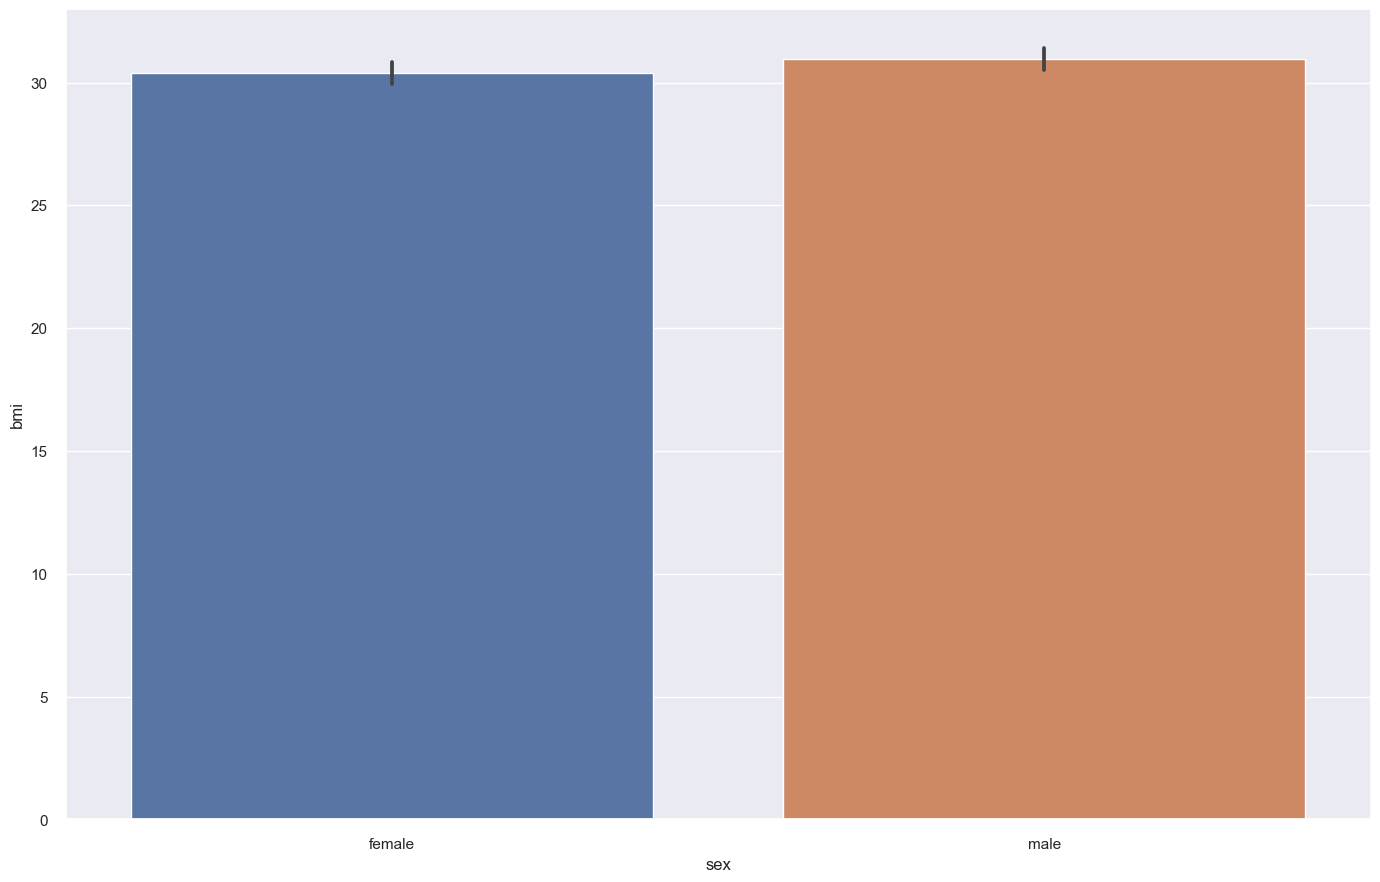

In [447]:
# Examine the relationship between “bmi” and “sex”.

sns.barplot(x='sex', y='bmi', data=df);     

The mean of BMI of men is a bit higher than women's.  BMI is around 30 for both gender.

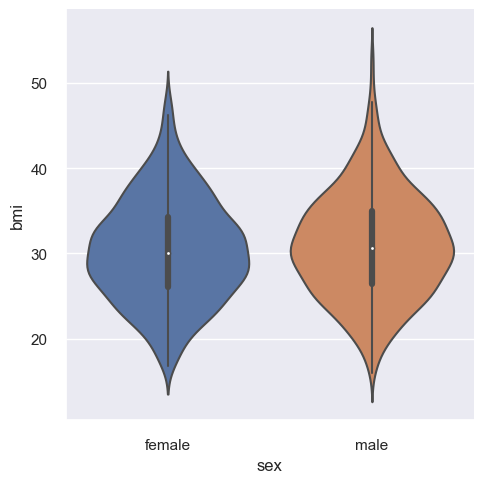

In [448]:
sns.catplot(x="sex",y="bmi",kind="violin",data=df);

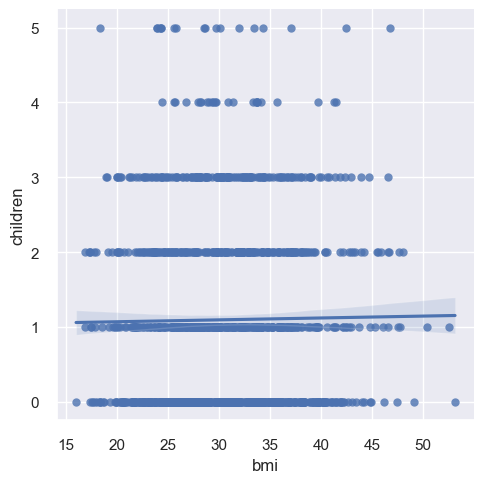

In [449]:
# Examine the relationship between “bmi” and “children”.

sns.lmplot(x="bmi", y="children", data=df);

People with bmi values between 25 and 35 have more children

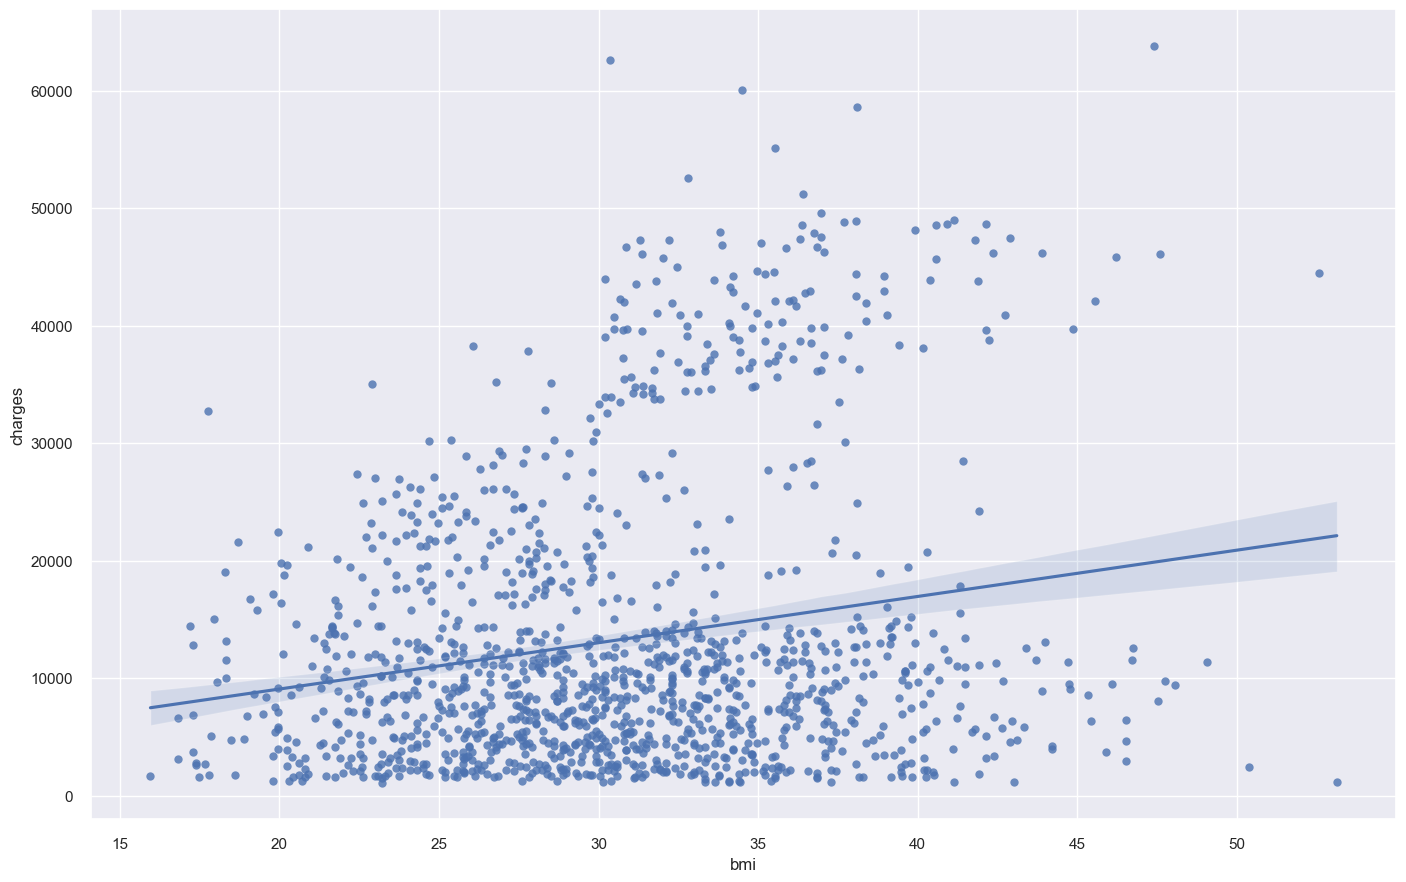

In [450]:
# Examine the relationship between “bmi” and “charges”.

sns.regplot(x='bmi', y='charges', data=df); 

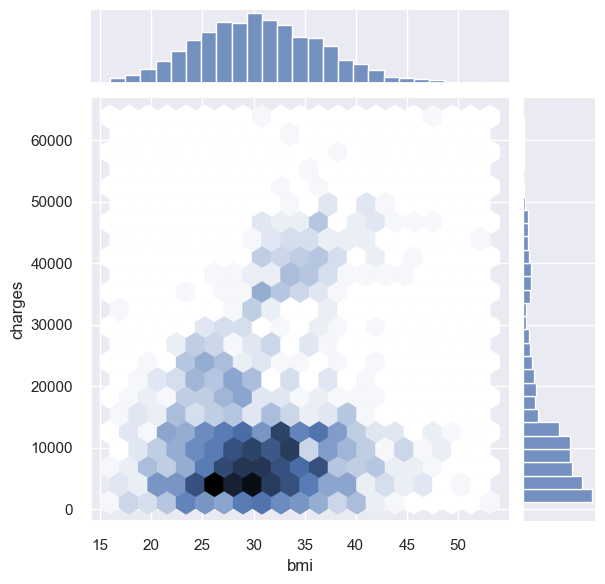

In [451]:
sns.jointplot(data=df, x="bmi", y="charges", kind="hex", gridsize=20)
plt.show()

#Charges are distributed mostly around 10.000 regardless of BMI. But above the value of 30, as bmi increases, the charges also increases.

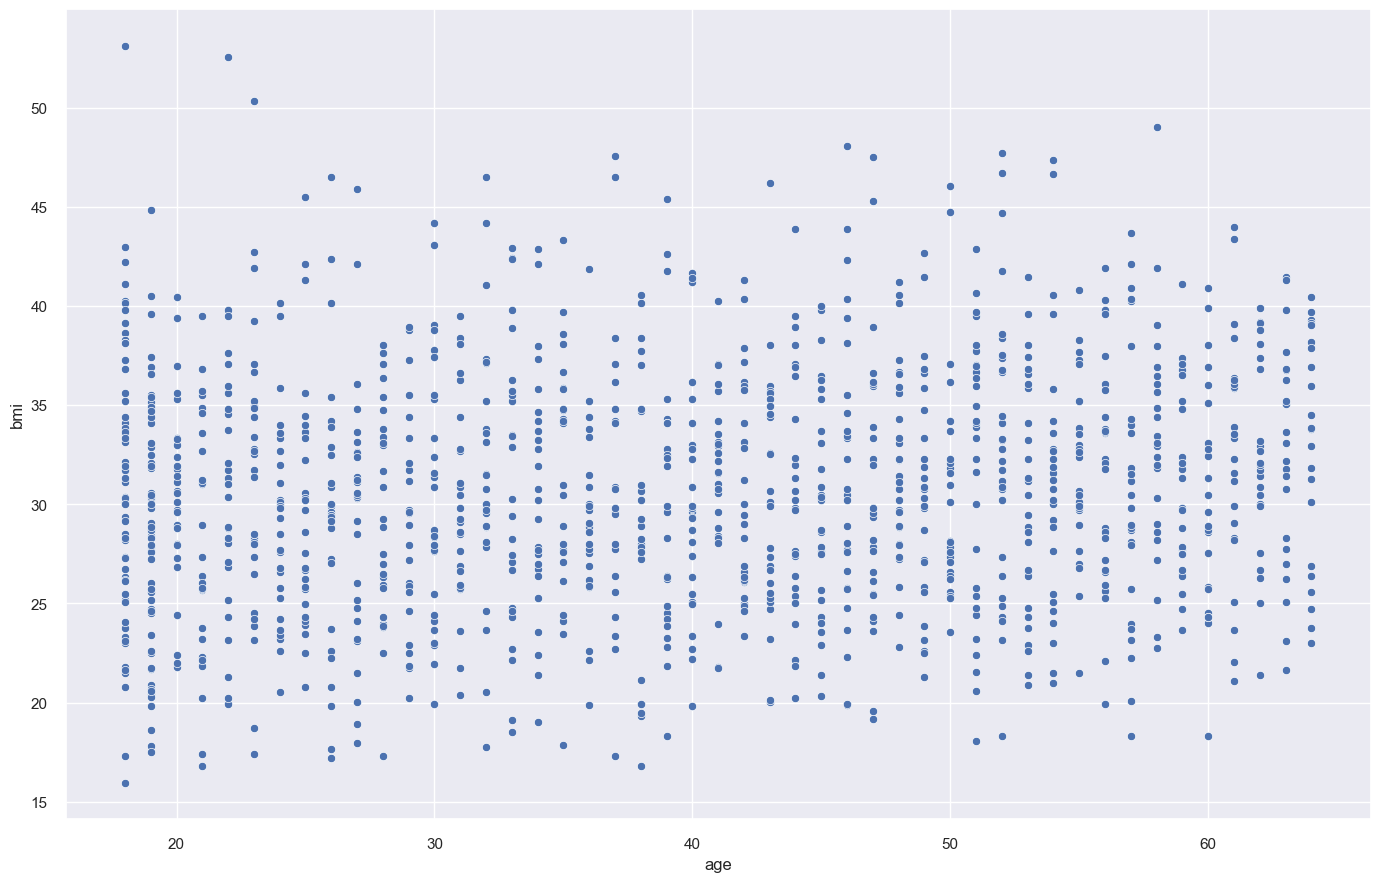

In [452]:
# Examine the relationship between “age” and “bmi”.
sns.scatterplot(x="age",y="bmi",data=df);

There is no relationship between age and bmi

Text(0.5, 1.0, 'Relationship between “region”, “smoker” and “bmi”')

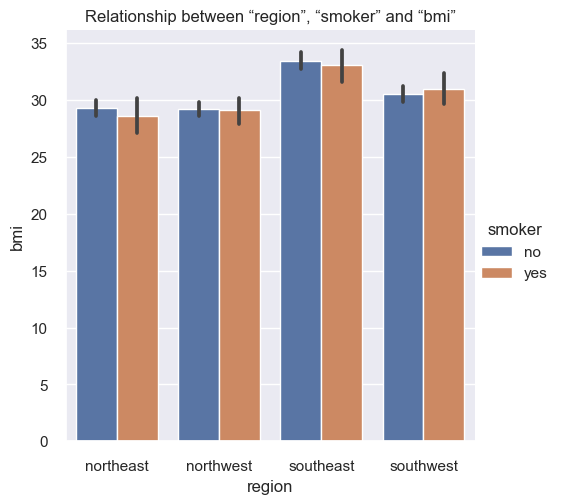

In [453]:
# Examine the relationship between “region”, “smoker” and “bmi” using bar plot.
sns.catplot(x="region", y="bmi", hue="smoker", kind="bar", data=df)
plt.title("Relationship between “region”, “smoker” and “bmi”")

 Mean BMI of smokers are higher than non-smokers in southwest region. In southeast and northeast regions' mean BMI of non-smokers are higher. In the northwest both smokers and non smokers mean BMI is the same.

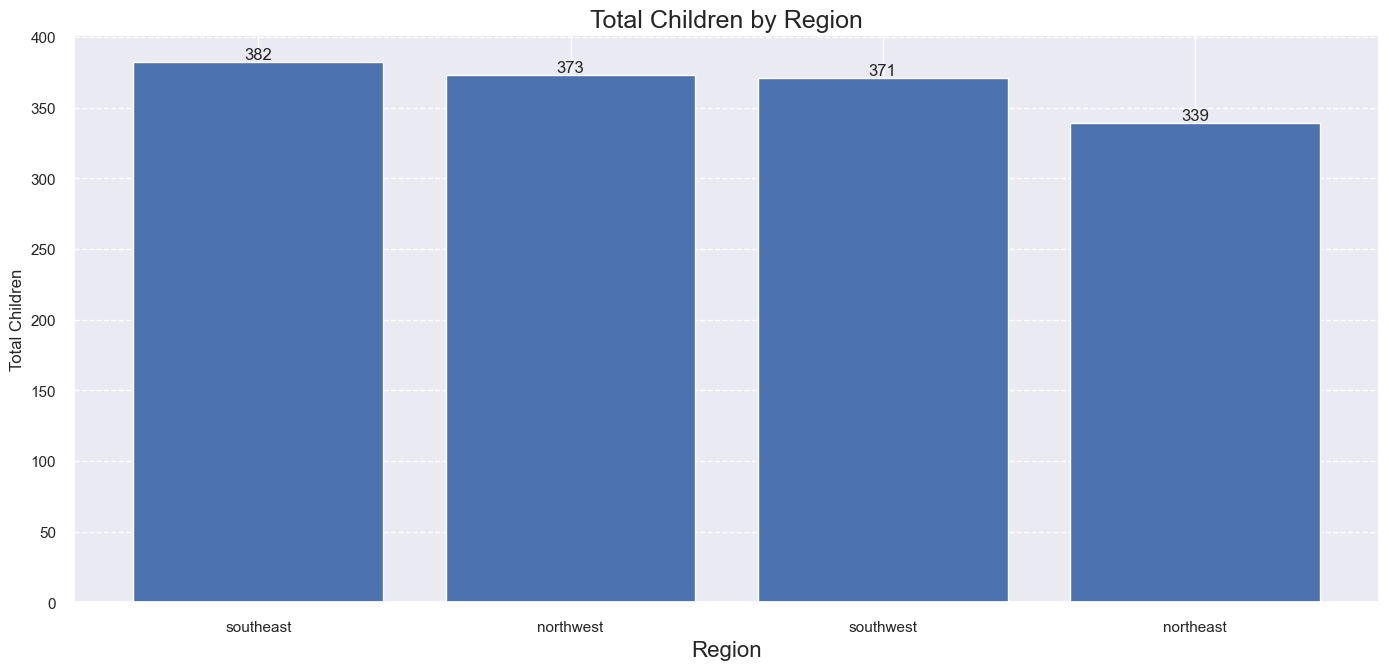

In [454]:
# Groupby region and take sum of children and sort in descending order
most_child_counts = df.groupby('region').children.sum().sort_values(ascending=False)

# Create a bar chart
fig = plt.figure(figsize=(15,7))
ax = fig.subplots()
ax.bar(most_child_counts.index, most_child_counts.values)


# Add labels and title
ax.set_xlabel('Region', fontsize=16)
ax.set_ylabel('Total Children')
ax.set_title('Total Children by Region', fontsize=18)

# Add grid lines
ax.grid(axis='y', linestyle='--')

# Add value labels to the top of each bar
for i, v in enumerate(most_child_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')
            
plt.show()

Southeast region has the most children 

<AxesSubplot: xlabel='bmi', ylabel='charges'>

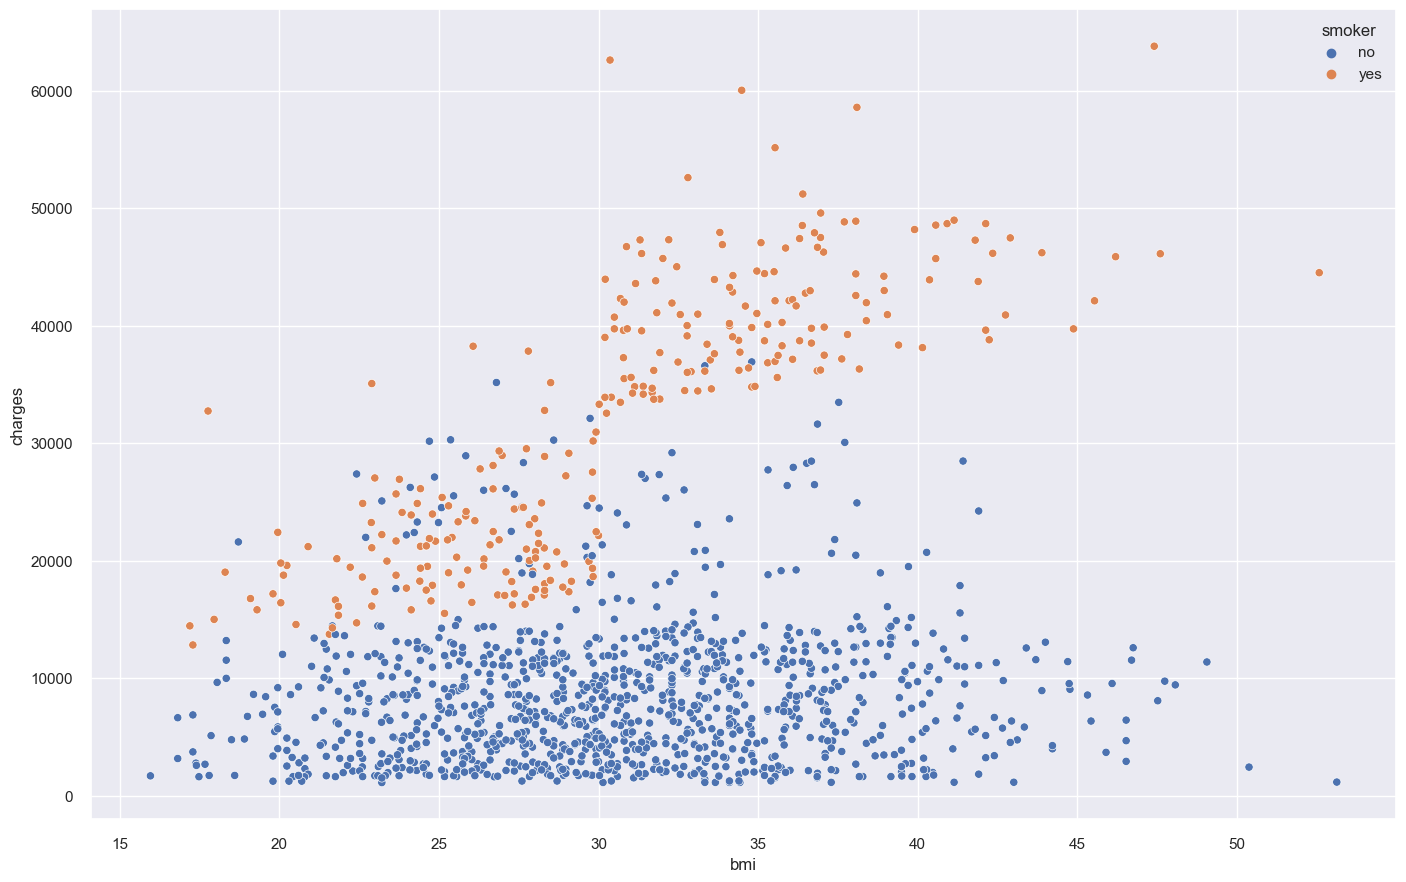

In [455]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = df)  # Visualize scatterplot 

Text(0.5, 1.0, 'Number of children vs Medical Charges')

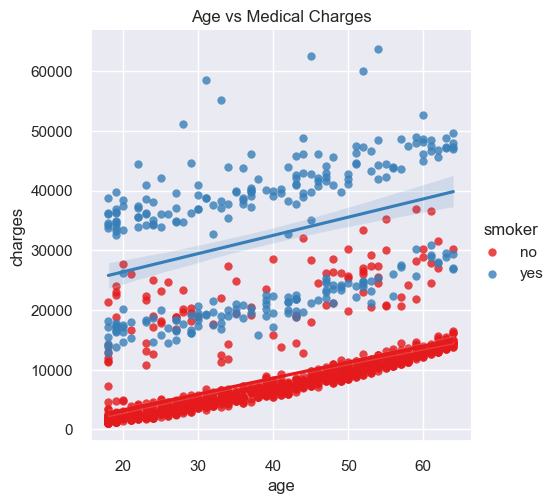

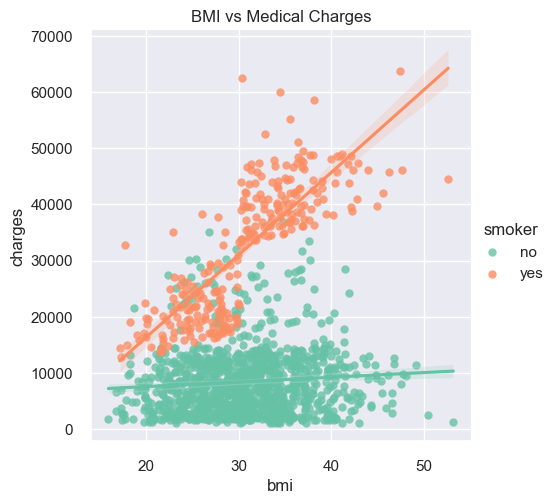

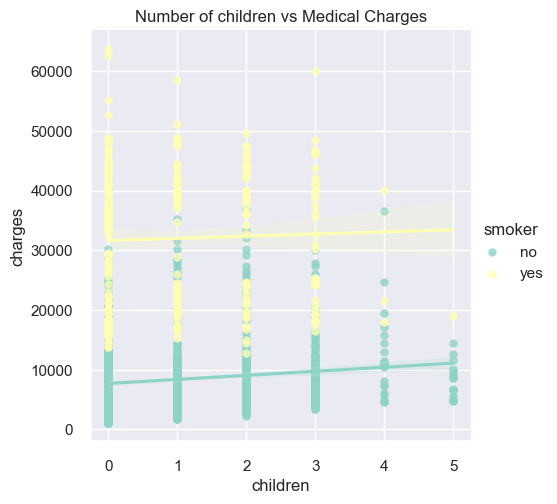

In [457]:
ax = sns.lmplot(x = 'age', y = 'charges', data = df, hue = 'smoker', palette = 'Set1')
plt.title('Age vs Medical Charges')

ax = sns.lmplot(x = 'bmi', y = 'charges', data = df, hue = 'smoker', palette = 'Set2')
plt.title('BMI vs Medical Charges')

ax = sns.lmplot(x = 'children', y = 'charges', data = df, hue = 'smoker', palette = 'Set3')
plt.title('Number of children vs Medical Charges')

In [ ]:
Smoking in combination with an increase in other factors, such as age, bmi, and children, further emphasizes and increases the charges (medical cost) due to smoking.

## 4. Data Preprocessing

In [528]:
# Drop "weight_status_4" and "weight_status_6" columns because it is used for EDA
 df.drop(columns=["weight_status_4","weight_status_6"],inplace=True)

In [532]:
df_model =df.copy()

In [543]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder ,MinMaxScaler
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics

In [535]:
# Converting Data to numerical type using LabelEncoder
#import library
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder() 

df_model['sex_labeled'] = label_encoder.fit_transform(df_model['sex'])
df_model['smoker_labeled'] = label_encoder.fit_transform(df_model['smoker'])
df_model['region_labeled'] = label_encoder.fit_transform(df_model['region'])

# fit and transform by using onehot encoder
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_columns = encoder.fit_transform(df_model[['sex_labeled', 'smoker_labeled', 'region_labeled']])
encoded_df = pd.DataFrame(encoded_columns)
data_encoded = pd.concat([df_model, encoded_df], axis=1)
data_encoded.drop(['sex', 'smoker', 'region'], axis=1, inplace=True)

In [536]:
# Create dependent and independent variables
X = data_encoded.drop(['charges'], axis=1)
y = data_encoded['charges']

## Preparing Data for Machine Learning

In [539]:
#import library
from sklearn.model_selection import train_test_split 
# split the set and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# convert the columns as string
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

## 1. Linear Regression

In [550]:
Lin_reg_model = LinearRegression()
Lin_reg_model.fit(X_train, y_train)

print('Intercept:', Lin_reg_model.intercept_)
print('Coefficients:', Lin_reg_model.coef_)

Intercept: -12724.275845103743
Coefficients: [ 2.61126126e+02  3.59236349e+02  5.29745486e+02 -1.89429301e+02
  1.19827488e+04 -3.08644926e+02 -1.89429301e+02  1.19827488e+04
  7.31175449e+00 -4.44110500e+02  1.90754773e+02]


In [552]:
from sklearn.metrics import r2_score, mean_squared_error

Lin_reg_model_train_pred = Lin_reg_model.predict(X_train)
Lin_reg_model_test_pred = Lin_reg_model.predict(X_test)

# Mean squared error
Lin_reg_model_train_mse = mean_squared_error(y_train, Lin_reg_model_train_pred)
Lin_reg_model_test_mse = mean_squared_error(y_test, Lin_reg_model_test_pred)
print('MSE train data: {:.3}, \nMSE test data: {:.3}\n'.format(Lin_reg_model_train_mse, Lin_reg_model_test_mse))

# Root Mean Squared error
print('RMSE train data: {:.3}, \nRMSE test data: {:.3}\n'.format(
    np.sqrt(np.absolute(Lin_reg_model_train_mse)), 
    np.sqrt(np.absolute(Lin_reg_model_train_mse))))

# R^2 - coefficient of determination
print('R2 train data: {:.3}, \nR2 test data: {:.3}\n'.format(
    r2_score(y_train,Lin_reg_model_train_pred),
    r2_score(y_test,Lin_reg_model_test_pred)))

# Model Score
print('Model Score:', Lin_reg_model.score(X_test, y_test))

MSE train data: 3.71e+07, 
MSE test data: 3.47e+07

RMSE train data: 6.09e+03, 
RMSE test data: 6.09e+03

R2 train data: 0.754, 
R2 test data: 0.732

Model Score: 0.7317858749256241


The model score generates a relatively good prediction; however, it would be improved.

## 2. Random Forest Regressor

In [560]:
from sklearn.ensemble import RandomForestRegressor


forest_model = RandomForestRegressor(n_estimators=100)
forest_model.fit(X_train_scaled, y_train)

y_train_pred_forest = forest_model.predict(X_train_scaled)
y_test_pred_forest = forest_model.predict(X_test_scaled)

In [561]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
cv_scores_forest = cross_val_score(forest_model, X_train_scaled, y_train, cv=5, scoring='r2')

mean_r2_forest = np.mean(cv_scores_forest)
std_r2_forest = np.std(cv_scores_forest)

print("Random Forest Regression - Mean R^2 value:", mean_r2_forest)
print("Random Forest Regression - R^2 std:", std_r2_forest)


Random Forest Regression - Mean R^2 value: 0.848985560624697
Random Forest Regression - R^2 std: 0.037497529401696025


In [562]:

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

print(f"The best parameters:, {best_params}")
print(f"The best RMSE score:, {best_score}")

The best parameters:, {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
The best RMSE score:, 4468.272711370738


In [563]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


y_train_pred = grid_search.best_estimator_.predict(X_train_scaled)
y_test_pred = grid_search.best_estimator_.predict(X_test_scaled)

train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")
     

Train RMSE: 3510.2919371924163
Test RMSE: 4782.657825023923
MAE: 2606.117907138997
R²: 0.8230930193287378
